---------------

---------------

---------------

---------------

# Initializations

In [1]:
datafolder = 'data/'
tmpfolder = 'tmp/'

In [2]:
from sympy import init_printing
init_printing()

%pylab inline

Populating the interactive namespace from numpy and matplotlib


1 - Robot Model
===============

In [3]:
import sympybotics
import sympy

#### Robot Definition

In [4]:
# rbtdef = sympybotics.RobotDef("ljhn_leftleg",
#             [(0, 0, 0, "q"),
#              ("pi/2", 0, -0.02496, "q+pi/2"),
#              ("pi/2", 0.12511, 0.07663, "q"),
#              ("pi", 0.29989, 0, "q"),
#              (0, 0.29989, 0, "q+pi"),
#              ("pi/2", 0, 0, "q"),
#              ],
#             dh_convention="mdh")

rbtdef = sympybotics.RobotDef("ljhn_rightleg",
            [(0, 0, 0, "q"),
             ("pi/2", 0, -0.02496, "q+pi/2"),
             ("pi/2", 0.12511, -0.07663, "q"),
             ("pi", 0.29989, 0, "q"),
             (0, 0.29989, 0, "q+pi"),
             ("pi/2", 0, 0, "q"),
             ],
            dh_convention="mdh")

rbtdef.gravityacc = sympy.Matrix([0.,0.,9.81])
rbtdef.frictionmodel = {}

#### Model Generation

In [5]:
%time rbt = sympybotics.RobotDynCode(rbtdef)
%time rbt.calc_base_parms()

CPU times: user 7.14 s, sys: 15.3 ms, total: 7.16 s
Wall time: 7.19 s
CPU times: user 8.25 s, sys: 281 ms, total: 8.53 s
Wall time: 7.11 s


In [6]:
leg = 'rightleg'
import pickle
with open(tmpfolder + 'robotmodels/ljhn_'+leg+'_model.pkl', 'wb') as file:
    pickle.dump( rbt, file )

## Base Dynamic Parameters

In [7]:
import pickle
with open(tmpfolder +  'robotmodels/ljhn_'+leg+'_model.pkl', 'rb' ) as file:
          rbt = pickle.load( file )

In [8]:
rbt.dyn.n_dynparms, rbt.dyn.n_base

(60, 36)

In [9]:
rbt.dyn.baseparms.n()

Matrix([
[                                 L_1zz + L_2yy - 0.04992*l_2z + 0.0006230016*m_2 + 0.0162755137*m_3 + 0.0162755137*m_4 + 0.0162755137*m_5 + 0.0162755137*m_6],
[L_2xx - L_2yy + L_3yy + L_4yy + L_5yy - 0.15326*l_3z + 0.15326*l_4z + 0.15326*l_5z - 0.0097803552*m_3 + 0.0801536569*m_4 + 0.170087669*m_5 + 0.170087669*m_6],
[                              L_2xy + 0.12511*l_3z - 0.12511*l_4z - 0.12511*l_5z - 0.0095871793*m_3 - 0.0095871793*m_4 - 0.0095871793*m_5 - 0.0095871793*m_6],
[                                                                                                                                                       L_2xz],
[                                                                                                                                                       L_2yz],
[       L_2zz + L_3yy + L_4yy + L_5yy - 0.15326*l_3z + 0.15326*l_4z + 0.15326*l_5z + 0.021524669*m_3 + 0.1114586811*m_4 + 0.2013926932*m_5 + 0.2013926932*m_6],
[                              

In [10]:
idyn_func_def = sympybotics.robotcodegen.robot_code_to_func( 'python', rbt.invdyn_code, 'idyn', 'idyn_func', rbt.rbtdef)
print idyn_func_def

def idyn_func(parms, q, dq, ddq):
#
    idyn = [0]*6
#
    x0 = sin(q[4])
    x1 = cos(q[5])
    x2 = cos(q[2])
    x3 = cos(q[1])
    x4 = sin(q[1])
    x5 = -x4
    x6 = dq[0]*x5
    x7 = dq[1]*x6
    x8 = ddq[0]*x3 + x7
    x9 = dq[0]*x3
    x10 = sin(q[2])
    x11 = -x10
    x12 = dq[1]*x2 + x11*x9
    x13 = ddq[1]*x10 + dq[2]*x12 + x2*x8
    x14 = -x13
    x15 = sin(q[3])
    x16 = dq[1]*x10 + x2*x9
    x17 = -x16
    x18 = -x8
    x19 = ddq[1]*x2 + dq[2]*x17 + x10*x18
    x20 = -x19
    x21 = cos(q[3])
    x22 = -x12
    x23 = x15*x22 + x16*x21
    x24 = -x23
    x25 = dq[3]*x24 + x14*x15 + x20*x21
    x26 = -x25
    x27 = x15*x17 + x21*x22
    x28 = dq[3]*x27 + x13*x21 + x15*x20
    x29 = -x28
    x30 = cos(q[4])
    x31 = -x27
    x32 = x0*x23 + x30*x31
    x33 = dq[4]*x32 + x0*x26 + x29*x30
    x34 = -x33
    x35 = sin(q[5])
    x36 = x0*x31 + x24*x30
    x37 = -x6
    x38 = dq[2] + x37
    x39 = -x38
    x40 = dq[3] + x39
    x41 = dq[4] + x40
    x42 = x1*x36 + x35*x41
    x

In [11]:
from sympybotics._compatibility_ import exec_

l = locals()
exec_(idyn_func_def, globals(), l)

tau_leg = l['idyn_func']


In [13]:
import yaml, sympy
with open(datafolder + 'robotparams/ljhn_'+leg+'_cad.yml', 'r') as f:
    ljhn_leg_cad = yaml.load(f)
dynparm_test = sympy.Matrix([ljhn_leg_cad.get(str(d), d) for d in rbt.dyn.dynparms])

In [14]:
import numpy as np

# q_test = [0*np.pi/180.,0*np.pi/180.,0*np.pi/180.,0*np.pi/180.,0*np.pi/180.,0*np.pi/180.]
q_test = [30*np.pi/180.,120*np.pi/180.,40*np.pi/180.,70*np.pi/180.,150*np.pi/180.,70*np.pi/180.]
dq_test = [30*np.pi/180.,120*np.pi/180.,40*np.pi/180.,70*np.pi/180.,150*np.pi/180.,70*np.pi/180.]
ddq_test = [30*np.pi/180.,120*np.pi/180.,40*np.pi/180.,70*np.pi/180.,150*np.pi/180.,70*np.pi/180.]

In [15]:
tau1 = tau_leg(dynparm_test, q_test, dq_test, ddq_test)
tau1

[-0.706218930439199,
 36.6938559906661,
 -5.16679330382387,
 -0.0748524987847302,
 0.132819545629511,
 -0.0934742410788906]

In [16]:
q_num_subs = dict(zip(rbt.rbtdef.q, q_test))

In [17]:
Tbase_rot = numpy.matrix([  [0,1,0,0],
                            [1,0,0,0],
                            [0,0,-1,0],
                            [0,0,0,1],
                     ])

Tbase_trans = numpy.matrix([[1,0,0,-0.10015],
                            [0,1,0,-0.00006],
                            [0,0,1,0.238],
                            [0,0,0,1],
                     ])

Tdes_rot = numpy.matrix([  [0,0,1,0],
                            [0,-1,0,0],
                            [1,0,0,0],
                            [0,0,0,1],
                     ])

In [18]:
T = rbt.geo.T[-1]
T = T.subs(q_num_subs)
T = numpy.matrix(T).astype(numpy.float64)
T = Tbase_rot*Tbase_trans*T*Tdes_rot
T

matrix([[-8.66025404e-01, -4.92403877e-01,  8.68240888e-02,
         -2.62478786e-01],
        [ 5.00000000e-01, -8.52868532e-01,  1.50383733e-01,
         -5.18951518e-01],
        [ 2.77555756e-17,  1.73648178e-01,  9.84807753e-01,
          1.35639240e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]])

2 - Excited Trajectory Optimization
==================================

In [19]:
import pickle
with open(tmpfolder +  'robotmodels/ljhn_'+leg+'_model.pkl', 'rb' ) as file:
          rbt = pickle.load( file )

In [27]:
from trajectory_optimization import TrajOptimizer
from trajectory_optimization import TrajPlotter
from numpy import deg2rad



base_freq = 0.05
fourier_order = 6

joint_constraints = []
cartesian_constraints = []


joint_constraints = [(1, deg2rad(-180), deg2rad(180), deg2rad(-120), deg2rad(120)),
                     (2, deg2rad(-180), deg2rad(180), deg2rad(-120), deg2rad(120)),
                     (3, deg2rad(-180), deg2rad(180), deg2rad(-120), deg2rad(120)),
                     (4, deg2rad(-180), deg2rad(180), deg2rad(-120), deg2rad(120)),
                     (5, deg2rad(-180), deg2rad(180), deg2rad(-120), deg2rad(120)),
                     (6, deg2rad(-180), deg2rad(180), deg2rad(-120), deg2rad(120))
                     ]

    
traj_optimizer = TrajOptimizer(rbt, fourier_order, base_freq,
                               joint_constraints=joint_constraints,
                               cartesian_constraints = cartesian_constraints)
                                                                                                 
                                                                                                                     
traj_optimizer.optimize()

joint constraint number: 6
cartesian constraint number: 0
constraint number: 24
frames_constrained: []
cond: 69.1953711483
cond: 69.1953711483
cond: 69.1953708091
cond: 69.195370612
cond: 69.1953728831
cond: 69.1953728657
cond: 69.1953665786
cond: 69.1953617001
cond: 69.1953746158
cond: 69.1953727527
cond: 69.1953703398
cond: 69.1953721036
cond: 69.1953701527
cond: 69.1953639883
cond: 69.1953529032
cond: 69.1953692246
cond: 69.1953716114
cond: 69.1953707773
cond: 69.1953698754
cond: 69.1953694638
cond: 69.1953689226
cond: 69.1954309735
cond: 69.1953992842
cond: 69.1953893121
cond: 69.1953837455
cond: 69.1953816481
cond: 69.1953794662
cond: 69.1953569709
cond: 69.1953567449
cond: 69.1953560681
cond: 69.1953578133
cond: 69.1953593535
cond: 69.195361827
cond: 69.1953644774
cond: 69.1954199169
cond: 69.1953912296
cond: 69.1953838378
cond: 69.1953794404
cond: 69.195376933
cond: 69.1953746037
cond: 69.1953855238
cond: 69.1953840825
cond: 69.1953838689
cond: 69.1953822132
cond: 69.1953813787


cond: 15.5003600315
cond: 15.5003618093
cond: 15.50036041
cond: 15.5003612871
cond: 15.5003597773
cond: 15.5003603529
cond: 15.5003590574
cond: 15.5003618529
cond: 15.500360704
cond: 15.5003603117
cond: 15.5003580026
cond: 15.5003616486
cond: 15.5003604581
cond: 15.5003624689
cond: 15.5003607879
cond: 15.5003595421
cond: 15.5003630889
cond: 15.5003663892
cond: 15.5003627321
cond: 15.5003658035
cond: 15.500361907
cond: 15.5003599454
cond: 15.5003621863
cond: 15.5003629137
cond: 15.5003575406
cond: 15.5003548004
cond: 15.5003619045
cond: 15.5003593359
cond: 15.5003611589
cond: 15.5003616386
cond: 15.5003609762
cond: 15.5003618328
cond: 15.5003611893
cond: 15.5003638677
cond: 15.5003612124
cond: 15.5003633528
cond: 15.5003623727
cond: 15.5003642049
cond: 15.5003660323
cond: 15.5003597866
cond: 15.5003625296
cond: 15.5003602258
cond: 15.5003609451
cond: 15.5003620833
cond: 15.5003532744
cond: 15.5003618622
cond: 15.5003584776
cond: 15.5003618838
cond: 15.500359819
cond: 15.5003602868
cond:

cond: 11.4722999704
cond: 11.4723002704
cond: 11.47229942
cond: 11.4722971353
cond: 11.4723008544
cond: 11.4723016553
cond: 11.4723045411
cond: 11.4723002508
cond: 11.4722989717
cond: 11.4723001054
cond: 11.4723028934
cond: 11.4723012517
cond: 11.4723003667
cond: 11.4722995985
cond: 11.4722985966
cond: 11.4722996524
cond: 11.4723003845
cond: 11.4722988777
cond: 11.4722988952
cond: 11.4722994535
cond: 11.4723004674
cond: 11.472299337
cond: 11.472301224
cond: 11.4722997424
cond: 11.4723034693
cond: 11.4723022435
cond: 11.472300036
cond: 11.4723000992
cond: 11.4723015376
cond: 11.4723017761
cond: 11.4723012958
cond: 11.4723014353
cond: 11.4723005713
cond: 11.472300924
cond: 11.4723003672
cond: 11.4722999031
cond: 11.4723003132
cond: 11.4722958569
cond: 11.4723008476
cond: 11.4723002075
cond: 11.4722995084
cond: 11.472299888
cond: 11.4722996441
cond: 11.4723015989
cond: 11.4723011631
cond: 11.4722999183
cond: 11.4723009811
cond: 11.4723006237
cond: 11.4722998872
cond: 11.4723001859
cond: 1

cond: 9.29380681924
cond: 9.29380712553
cond: 9.29380961575
cond: 9.29380426528
cond: 9.29380523947
cond: 9.2938044908
cond: 9.29380533442
cond: 9.29380487433
cond: 9.29380423487
cond: 9.29380627032
cond: 9.2938052076
cond: 9.29380576052
cond: 9.29380434684
cond: 9.29380535677
cond: 9.29380488852
cond: 9.29380561358
cond: 9.29380588396
cond: 9.29380487273
cond: 9.2938049308
cond: 9.29380516729
cond: 9.29380431285
cond: 9.29380543235
cond: 9.29380279214
cond: 9.29380429251
cond: 9.29380394259
cond: 9.29380510778
cond: 9.29380461487
cond: 9.2938045371
cond: 9.29380273095
cond: 9.2938039912
cond: 9.29380448749
cond: 9.2938041325
cond: 9.29380436963
cond: 9.29380495965
cond: 9.29380574796
cond: 9.29380421177
cond: 9.29380432656
cond: 9.29380360288
cond: 9.29380530497
cond: 9.29380426443
cond: 9.29380445077
cond: 9.2938031105
cond: 9.29380402845
cond: 9.29380413199
cond: 9.29380435429
cond: 9.29380427018
cond: 9.29380518033
cond: 9.29380473704
cond: 9.29380465584
cond: 9.29380617616
cond: 9

cond: 8.58731107873
cond: 8.58731196151
cond: 8.58731104008
cond: 8.5873103619
cond: 8.58731139734
cond: 8.58731103105
cond: 8.58731215109
cond: 8.587312952
cond: 8.58731130231
cond: 8.58731158421
cond: 8.58731101736
cond: 8.58731137421
cond: 8.5873113366
cond: 8.58731151458
cond: 8.58730992477
cond: 8.58731122515
cond: 8.5873124282
cond: 8.58731113346
cond: 8.58731165355
cond: 8.58731046371
cond: 8.58730939539
cond: 8.58731196435
cond: 8.58731102416
cond: 8.5873118767
cond: 8.58731133119
cond: 8.58731137204
cond: 8.58731179641
cond: 8.58731003645
cond: 8.58731113094
cond: 8.58731199446
cond: 8.58731112464
cond: 8.58731150173
cond: 8.58731074949
cond: 8.58730822483
cond: 8.58731202091
cond: 8.58731069151
cond: 8.58731176693
cond: 8.5873112398
cond: 8.5873114075
cond: 8.58731250355
cond: 8.58731005585
cond: 8.58730954472
cond: 8.58731130257
cond: 8.58731115904
cond: 8.58731074436
cond: 8.58731099454
cond: 8.58731388431
cond: 8.58731067188
cond: 8.58731279341
cond: 8.58731181677
cond: 8.

cond: 8.12136596162
cond: 8.121366112
cond: 8.12136678836
cond: 8.12136446424
cond: 8.12136691695
cond: 8.12136616778
cond: 8.12136603192
cond: 8.12136583555
cond: 8.12136602772
cond: 8.12136462509
cond: 8.12136654787
cond: 8.12136487434
cond: 8.12136551378
cond: 8.12136616621
cond: 8.12136587468
cond: 8.12136715667
cond: 8.12136546961
cond: 8.12136652357
cond: 8.12136576021
cond: 8.12136611929
cond: 8.12136564634
cond: 8.12136612366
cond: 8.12136271335
cond: 8.12136696715
cond: 8.1213642511
cond: 8.12136539118
cond: 8.12136593847
cond: 8.1213660349
cond: 8.1213660554
cond: 8.12136448263
cond: 8.12136548137
cond: 8.12136611759
cond: 8.12136586331
cond: 8.12136562085
cond: 8.12136624762
cond: 8.12136653472
cond: 8.12136652498
cond: 8.12136682543
cond: 8.1213664628
cond: 8.12136575544
cond: 8.12136581791
cond: 10.557212606
cond: 8.30994029803
cond: 8.11795809726
cond: 8.10100733855
cond: 8.10100733855
cond: 8.10100733904
cond: 8.10100735546
cond: 8.10100716193
cond: 8.10100697288
cond: 8

cond: 7.99562022358
cond: 7.99562072109
cond: 7.99562040183
cond: 7.99561944776
cond: 7.99562182244
cond: 7.99562060666
cond: 7.99562053198
cond: 7.99562037203
cond: 7.99562103339
cond: 7.99562128917
cond: 7.99561834092
cond: 7.99562039514
cond: 7.99562062482
cond: 7.99562069327
cond: 7.99562061958
cond: 7.99562040752
cond: 7.99561948548
cond: 7.99562052645
cond: 7.99562083443
cond: 7.99562010367
cond: 7.99562052725
cond: 7.9956211796
cond: 7.99562063272
cond: 7.99562163556
cond: 7.99562032544
cond: 7.99562095211
cond: 7.99562048768
cond: 7.99562077506
cond: 7.99562054375
cond: 7.99561959763
cond: 7.99561977515
cond: 7.99562127768
cond: 7.99562080243
cond: 7.99562046684
cond: 7.99562037782
cond: 8.92272403328
cond: 8.01452073289
cond: 7.9775265771
cond: 7.9775265771
cond: 7.97752662522
cond: 7.97752634575
cond: 7.97752621555
cond: 7.9775263607
cond: 7.97752706277
cond: 7.97752672573
cond: 7.97752676546
cond: 7.97752660491
cond: 7.97752654534
cond: 7.97752651795
cond: 7.97752630183
cond

cond: 7.9127751047
cond: 7.91277450157
cond: 7.91277415586
cond: 7.91277414885
cond: 7.91277429756
cond: 7.91277365077
cond: 7.9127712702
cond: 7.91277375891
cond: 7.91277295524
cond: 7.91277328663
cond: 7.91277400163
cond: 7.91277415517
cond: 7.91277411747
cond: 7.91277506105
cond: 7.91277488399
cond: 7.91277436163
cond: 7.91277456376
cond: 7.91277418909
cond: 7.91277436971
cond: 7.9127751371
cond: 7.91277405695
cond: 7.91277456973
cond: 7.91277435759
cond: 7.91277410966
cond: 7.91277376177
cond: 8.76820320949
cond: 7.92089985837
cond: 7.8812909061
cond: 7.8812909061
cond: 7.88129105316
cond: 7.88129062478
cond: 7.88129097584
cond: 7.88129062203
cond: 7.88129108365
cond: 7.8812891492
cond: 7.88129065119
cond: 7.88129032392
cond: 7.88129071742
cond: 7.8812906207
cond: 7.88129064486
cond: 7.88129002107
cond: 7.8812919032
cond: 7.88128919954
cond: 7.88129086104
cond: 7.88129210324
cond: 7.88129033887
cond: 7.88129204895
cond: 7.88129257799
cond: 7.88129054602
cond: 7.88129041911
cond: 7.

cond: 7.7707098803
cond: 7.77070958928
cond: 7.77070951094
cond: 7.77070968457
cond: 7.77070988502
cond: 7.77071085301
cond: 7.77071050329
cond: 7.77070879112
cond: 7.77070967237
cond: 7.77070911572
cond: 7.77070982418
cond: 7.77071053034
cond: 7.77070826721
cond: 7.77070872272
cond: 7.77070965416
cond: 7.77070967062
cond: 7.77070951881
cond: 7.85377728841
cond: 7.70585035799
cond: 7.70585035799
cond: 7.7058502828
cond: 7.7058500822
cond: 7.70585019763
cond: 7.70585048163
cond: 7.70585084244
cond: 7.70584959376
cond: 7.70584998111
cond: 7.70585049329
cond: 7.70585043128
cond: 7.70585078955
cond: 7.7058494128
cond: 7.70584963549
cond: 7.70585007002
cond: 7.70585233749
cond: 7.7058517284
cond: 7.70584985857
cond: 7.70584948122
cond: 7.70585038258
cond: 7.70585251243
cond: 7.70585339285
cond: 7.70585067715
cond: 7.70585046223
cond: 7.70584966351
cond: 7.70585030846
cond: 7.70585052384
cond: 7.70585039727
cond: 7.70585014995
cond: 7.70585045085
cond: 7.70585014713
cond: 7.70584990588
cond:

cond: 7.65941477344
cond: 7.65941405728
cond: 7.65941488724
cond: 7.65941569048
cond: 7.65941543598
cond: 7.65941472047
cond: 7.65941482959
cond: 7.86084373121
cond: 7.64655038555
cond: 7.64655038555
cond: 7.64655018031
cond: 7.64655050155
cond: 7.64655042608
cond: 7.64655038284
cond: 7.64655062619
cond: 7.64654999624
cond: 7.64655014691
cond: 7.64655059126
cond: 7.64655008959
cond: 7.64655063545
cond: 7.64655046293
cond: 7.64655017564
cond: 7.64654838842
cond: 7.64654956856
cond: 7.64654936675
cond: 7.6465516625
cond: 7.64654908731
cond: 7.64655183708
cond: 7.64655241584
cond: 7.64654923074
cond: 7.64655312326
cond: 7.64655024997
cond: 7.6465504497
cond: 7.64655007773
cond: 7.64655063648
cond: 7.64654996638
cond: 7.64655077349
cond: 7.64655026237
cond: 7.6465499049
cond: 7.64654991728
cond: 7.64655066441
cond: 7.64655074121
cond: 7.64655155645
cond: 7.64655175331
cond: 7.64655090999
cond: 7.64655083984
cond: 7.6465509332
cond: 7.64655047611
cond: 7.64655111503
cond: 7.64654929566
cond

## plot excited trajectory

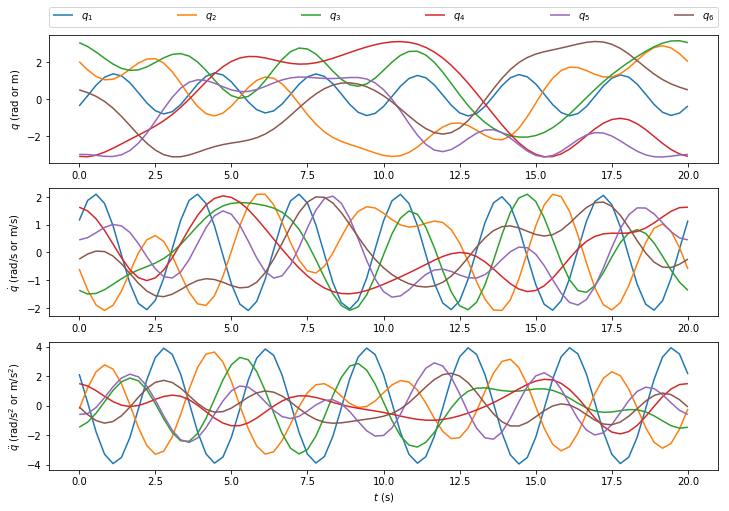

In [28]:
# %matplotlib qt 

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

traj_plotter = TrajPlotter(traj_optimizer.fourier_traj,traj_optimizer.frame_traj,
                           traj_optimizer.const_frame_ind)
traj_plotter.plot_desired_traj(traj_optimizer.x_result)

## save trajectory

In [29]:
from utils import save_data, load_data

trajectory_name = 'ljhn_'+leg+'_traj1'
trajectory_folder =  'data/trajectories/'

dof_order_bf_x_norm = (traj_optimizer.fourier_traj.dof, fourier_order,
                       base_freq, traj_optimizer.x_result, [])
save_data(trajectory_folder, trajectory_name, dof_order_bf_x_norm)

freq = 50
tf = 65 # including 5 seconds' prestable time
traj_optimizer.make_traj_csv(trajectory_folder, trajectory_name, freq, tf)

## display trajectory param

In [30]:
from IPython.display import HTML, display
import tabulate
import numpy as np

table = []
table.append(["joint", 'qo'] +
             ["a"+str(i+1) for i in range(fourier_order)] +
             ["b"+str(i+1) for i in range(fourier_order)])
for i in range(traj_optimizer.fourier_traj.dof):
    line = []
    line.append(rbt.rbtdef.q[i])
    line += np.round(traj_optimizer.x_result[i*(1 + fourier_order*2): (i+1)*(1 + fourier_order*2)], 4).tolist()
    table.append(line)

display(HTML(tabulate.tabulate(table, tablefmt='html')))

joint,qo,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,b5,b6
q1,0.2311,0.0198,-0.0008,0.0035,0.0062,-0.0025,1.7433,-0.0044,0.0201,-0.0107,-0.0035,0.0205,1.1238
q2,-0.0573,0.0674,-0.3361,-0.0894,0.5831,-0.6124,-1.2572,-0.703,0.1194,-0.2401,0.4496,-0.0626,-0.1627
q3,1.1205,0.3434,-0.1184,-0.5314,0.1384,-0.9084,0.5008,-0.1374,-0.8745,0.0251,0.5367,-0.5294,-0.3882
q4,-0.0493,0.4041,-0.1129,-0.9762,0.0411,0.2961,0.0782,0.805,-0.1922,0.3056,0.271,0.2778,0.1599
q5,-1.1989,0.5247,-0.3627,0.0563,-0.6615,0.2507,0.2539,0.3813,0.2682,0.4372,0.0857,0.1138,-0.8361
q6,-0.0986,-0.6122,-1.0001,0.608,-0.2032,0.2989,0.3952,-0.1274,-0.1154,0.1494,-0.3388,0.1355,0.0541


3 - Regression Data Processing
==============================

In [31]:
import os
import pickle
import math
import sympy
import numpy
import sympybotics

In [32]:
with open(tmpfolder +  'robotmodels/ljhn_'+leg+'_model.pkl', 'rb' ) as file:
          rbt = pickle.load( file )

### Data Load

In [33]:
parms_traj = 'traj1'

In [35]:
from support_funcs.regr_data_proc import load_trajectory_data

training_results_data_file = datafolder +'recdata/' + 'ljhn_'+leg+'_'+parms_traj+'_results.csv'

trajectory_sampling_rate = 50
t_raw, q_raw, dq_raw, tau_raw = load_trajectory_data(training_results_data_file,
                                                                   trajectory_sampling_rate)

(<type 'numpy.ndarray'>, (2990, 18))


### Some Plots

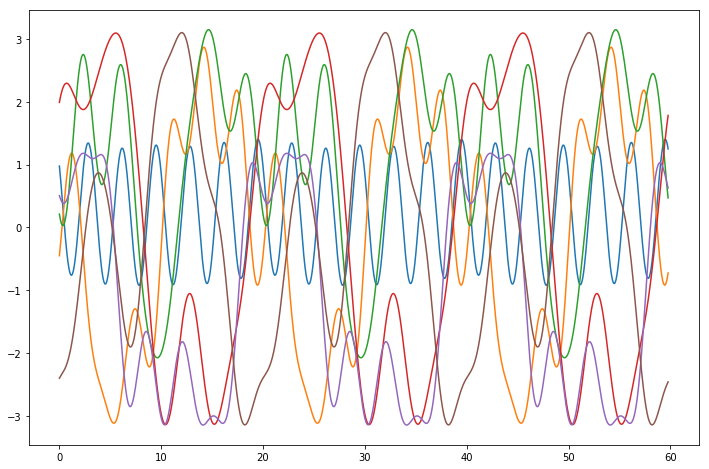

In [36]:
from matplotlib import pyplot as plt
plt.close()

# for d in range(rbt.dof):
#     co_num = str(d + 1)
#     plt.plot(t_raw, q_raw[:, d], label=(r"$q_" + co_num +"$"), linestyle= (0, ()))
    
for i in range(q_raw.shape[1]):
    plt.plot(t_raw,q_raw[:,i])

plt.show()

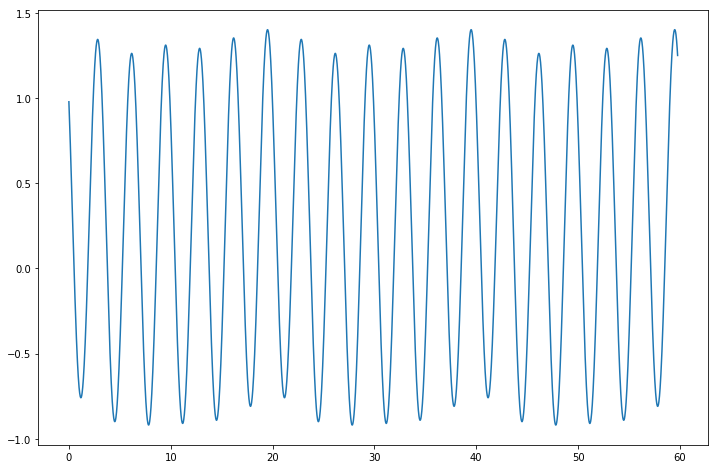

In [38]:
from matplotlib import pyplot as plt
plt.close()

joint = 1
# plt.plot(t_ref+0.20,q_ref[:,joint-1])
plt.plot(t_raw,q_raw[:,joint-1])

plt.show()

In [39]:
del t_raw, q_raw, dq_raw,tau_raw

### Parameter Load

In [40]:
from utils import save_data, load_data

training_trajectory_name = 'ljhn_'+leg+'_traj1'


trajectory_folder = datafolder +'trajectories/'
dof, fourier_order, base_freq, traj_optimizer_result, reg_norm_mat = load_data(trajectory_folder,
                                                                               training_trajectory_name)
print("dof: {}".format(dof))
print("Fourier order: {}".format(fourier_order))
print("Base frequency: {}".format(base_freq))

dof: 6
Fourier order: 6
Base frequency: 0.05


### Filter Cut-off Frequency Definition

In [64]:
# times of the highest frequency in the Fourier series
fc_mult = 25.0 #10

fc = base_freq * fourier_order * fc_mult
print("Cut frequency: {}".format(fc))

Cut frequency: 7.5


In [65]:
fc_q = fc
fc_dq = fc
fc_ddq = fc

fc_tau =  fc

si = 200
sf = -200

### Data Filtering, Differentiation and Regression Data Generation

In [66]:
rec_h = 0.02

In [67]:
from support_funcs.regr_data_proc import load_trajectory_data, plot_trajectory_data, \
                                            diff_and_filt_data, gen_regr_matrices


def process_regression_data(traj_name):
#     t_raw, q_raw, tau_raw, t_ref, q_ref = read_data(dof=rbt.dof, h=rec_h,
#                                                     rbtlogfile=datafolder + 'recdata/rbtlog_%s.dat'%traj_name,
#                                                     trajreffile=datafolder + 'trajectories/%s.dat'%traj_name)
    
    training_results_data_file = datafolder +'recdata/' + 'ljhn_'+leg+'_%s_results.csv'%traj_name
    trajectory_sampling_rate = 50
    t_raw, q_raw, dq_raw, tau_raw = load_trajectory_data(training_results_data_file,
                                                                   trajectory_sampling_rate)
    
    q, dq, ddq, tau = diff_and_filt_data(dof=rbt.dof, h=rec_h,  q_raw=q_raw, tau_raw=tau_raw,
                                   fc_q=fc_q, fc_dq=fc_dq, fc_ddq=fc_ddq, fc_tau=fc_tau)
    
    t_raw = t_raw[si:sf]; q_raw = q_raw[si:sf]; tau_raw = tau_raw[si:sf]
    q = q[si:sf]; dq = dq[si:sf]; ddq = ddq[si:sf]; tau = tau[si:sf]
    
    t_raw = t_raw - t_raw[0]
    
    t = numpy.array(range(q.shape[0])) * rec_h
    
    W, omega, Q1, R1, rho1 = gen_regr_matrices(rbt, q, dq, ddq, tau)
    
    return t_raw, q_raw, tau_raw, t, q, dq, ddq, tau, W, omega, Q1, R1, rho1

>>>>>>>> traj1 proc <<<<<<<<<
(<type 'numpy.ndarray'>, (2990, 18))
CPU times: user 1.7 s, sys: 139 ms, total: 1.84 s
Wall time: 1.26 s
 (cond=10.516976)
traj1 save
CPU times: user 636 ms, sys: 55.2 ms, total: 691 ms
Wall time: 445 ms
plot shape: 460


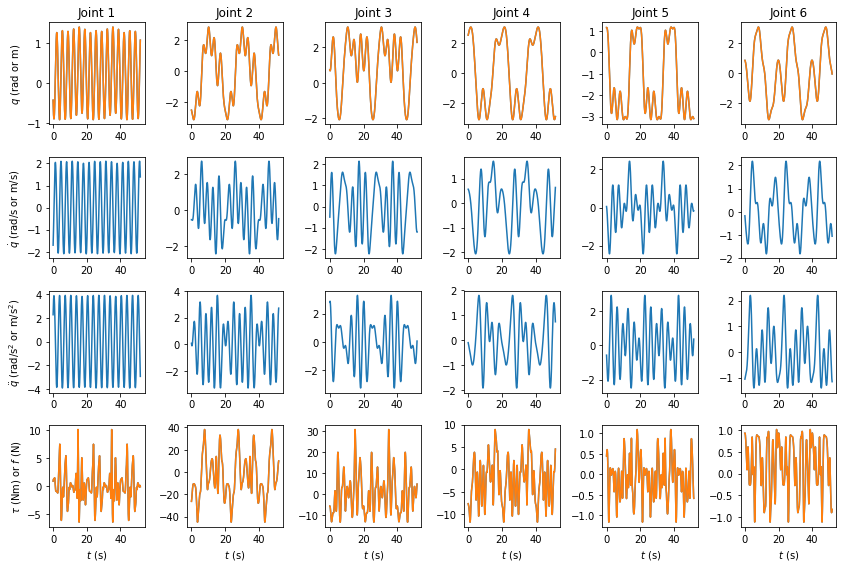

>>>>>>>> traj2 proc <<<<<<<<<
(<type 'numpy.ndarray'>, (2990, 18))
CPU times: user 1.35 s, sys: 26.7 ms, total: 1.37 s
Wall time: 858 ms
 (cond=12.680817)
traj2 save
CPU times: user 697 ms, sys: 40.8 ms, total: 738 ms
Wall time: 478 ms
plot shape: 460


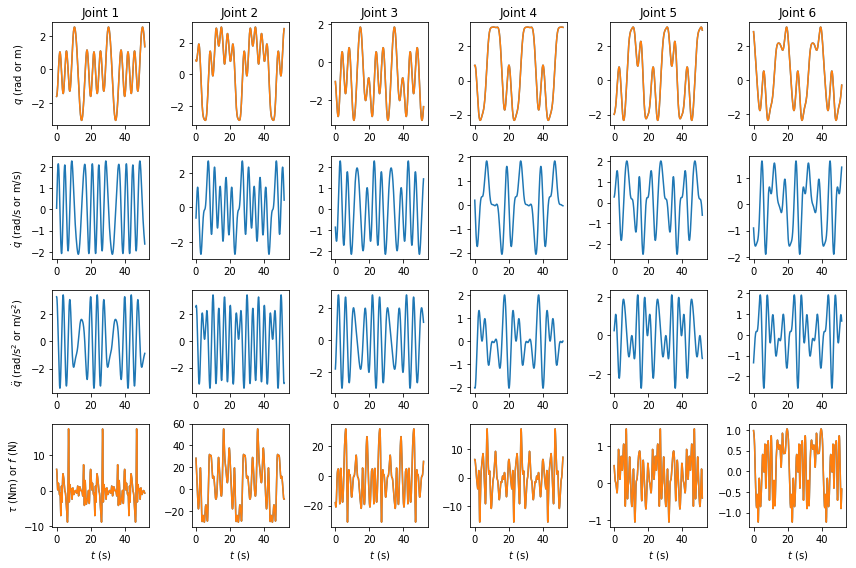

>>>>>>>> traj3 proc <<<<<<<<<
(<type 'numpy.ndarray'>, (2990, 18))
CPU times: user 1.68 s, sys: 43.7 ms, total: 1.72 s
Wall time: 1.11 s
 (cond=14.927492)
traj3 save
CPU times: user 713 ms, sys: 23.9 ms, total: 736 ms
Wall time: 480 ms
plot shape: 460


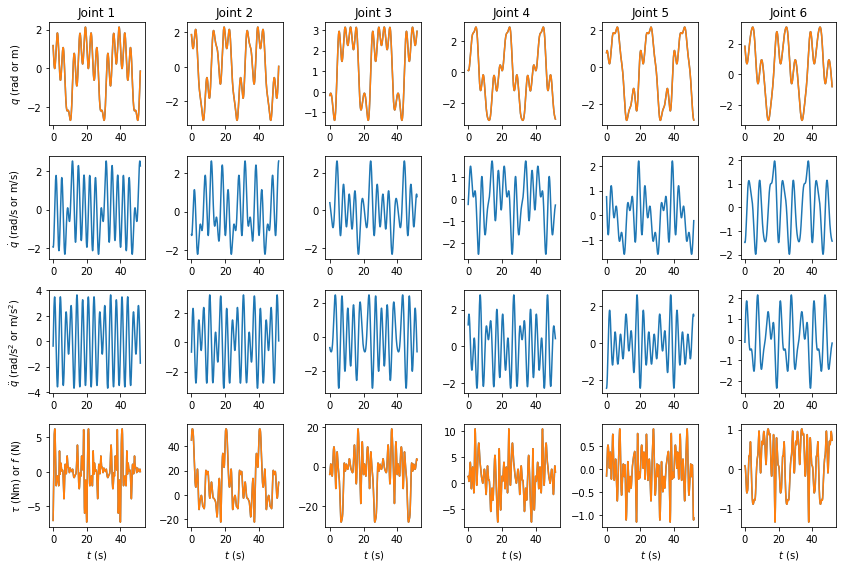

In [68]:
from support_funcs.utils import _fprint
from support_funcs.regr_data_proc import plot_trajectory_data

for traj in ['traj1', 'traj2', 'traj3']:      #, 'traj4'
    _fprint('>>>>>>>> %s proc <<<<<<<<<'%traj)
    %time t_raw, q_raw, tau_raw, t, q, dq, ddq, tau, W, omega, Q1, R1, rho1 = process_regression_data(traj)
    
    _fprint(' (cond=%f)'%numpy.linalg.cond(W))
    
    _fprint('%s save'%traj)
    
    %time \
    numpy.savez_compressed(tmpfolder + 'procdata/' + traj + '_raw', t=t_raw, q=q_raw, tau=tau_raw);\
    numpy.savez_compressed(tmpfolder + 'procdata/' + traj + '_proc', t=t, q=q, dq=dq, ddq=ddq, tau=tau); \
    numpy.savez_compressed(tmpfolder + 'procdata/' + traj + '_regr', W=W, omega=omega, Q1=Q1, R1=R1, rho1=rho1)
    
    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = [12,8]
    plot_trajectory_data(t, q_raw, q, dq, ddq,
                     tau_raw, tau)
    
    del t_raw, q_raw, tau_raw, t, q, dq, ddq, tau, W, omega, Q1, R1, rho1

### Plot

In [69]:
raw = numpy.load(tmpfolder + 'procdata/traj1_raw.npz')
tau_raw = raw['tau']
q_raw = raw['q']
del raw
proc = numpy.load(tmpfolder + 'procdata/traj1_proc.npz')
t = proc['t']
tau = proc['tau']
q = proc['q']
dq = proc['dq']
del proc

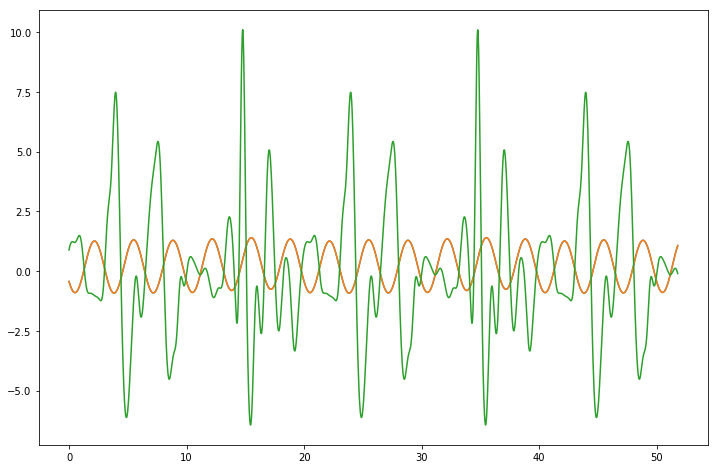

In [70]:
from matplotlib import pyplot as plt
plt.close()

joint = 1
firsts = 20000
plt.plot(t[:firsts],q_raw[:,joint-1][:firsts])
plt.plot(t[:firsts],q[:,joint-1][:firsts])
#plt.plot(t[:firsts],dq[:,joint-1][:firsts])
plt.plot(t[:firsts],tau_raw[:,joint-1][:firsts])

plt.show()

In [71]:
del t, q, dq, tau, q_raw, tau_raw

4 - Dynamic Parameter Estimation
================================

In [72]:
import os
import pickle
import sympy
import numpy
import time

import sympybotics
import lmi_sdp

from lmi_sdp import init_lmi_latex_printing
init_lmi_latex_printing()

In [73]:
with open(tmpfolder +  'robotmodels/ljhn_'+leg+'_model.pkl', 'rb' ) as file:
          rbt = pickle.load( file )

In [74]:
epsilon_safemargin = 1e-6
epsilon_sdptol = 1e-7

## LMI Matrix Definitions

In [75]:
dof = rbt.dof

delta = rbt.dyn.dynparms
n_delta = rbt.dyn.n_dynparms

beta = rbt.dyn.baseparms.n()
n_beta = rbt.dyn.n_base
beta_symbs = sympy.Matrix([sympy.Symbol('beta'+str(i+1),real=True) for i in range(n_beta)])

delta_d = (rbt.dyn.Pd.T*delta)
n_delta_d = len(delta_d)

Pb = rbt.dyn.Pb

varchange_dict = dict(zip(Pb.T*delta ,  beta_symbs - ( beta - Pb.T*delta )))

In [76]:
from support_funcs.utils import skew, mrepl
from sympy import BlockMatrix, Matrix, eye, Identity
I = Identity
S = skew

In [77]:
D_inertia_blocks = []
for i in range(dof):
    L = rbt.rbtdef.L[i]
    l = rbt.rbtdef.l[i]
    m = rbt.rbtdef.m[i]
    Di = BlockMatrix([[L,    S(l).T],
                      [S(l), I(3)*m]])
    D_inertia_blocks.append(Di.as_explicit())

In [78]:
D_inertia_blocks[0]

Matrix([
[L_1xx, L_1xy, L_1xz,     0,  l_1z, -l_1y],
[L_1xy, L_1yy, L_1yz, -l_1z,     0,  l_1x],
[L_1xz, L_1yz, L_1zz,  l_1y, -l_1x,     0],
[    0, -l_1z,  l_1y,   m_1,     0,     0],
[ l_1z,     0, -l_1x,     0,   m_1,     0],
[-l_1y,  l_1x,     0,     0,     0,   m_1]])

In [79]:
D_other_blocks = []
for i in range(dof):
    if rbt.rbtdef.driveinertiamodel == 'simplified':
        D_other_blocks.append( Matrix([rbt.rbtdef.Ia[i]]) )
    if 'viscous' in rbt.rbtdef.frictionmodel:
        D_other_blocks.append( Matrix([rbt.rbtdef.fv[i]]) )
    if 'Coulomb' in rbt.rbtdef.frictionmodel:
        D_other_blocks.append( Matrix([rbt.rbtdef.fc[i]]) )

D_other_blocks

[]

In [80]:
D_blocks = D_inertia_blocks + D_other_blocks

In [81]:
D_blocks

[Matrix([
 [L_1xx, L_1xy, L_1xz,     0,  l_1z, -l_1y],
 [L_1xy, L_1yy, L_1yz, -l_1z,     0,  l_1x],
 [L_1xz, L_1yz, L_1zz,  l_1y, -l_1x,     0],
 [    0, -l_1z,  l_1y,   m_1,     0,     0],
 [ l_1z,     0, -l_1x,     0,   m_1,     0],
 [-l_1y,  l_1x,     0,     0,     0,   m_1]]), Matrix([
 [L_2xx, L_2xy, L_2xz,     0,  l_2z, -l_2y],
 [L_2xy, L_2yy, L_2yz, -l_2z,     0,  l_2x],
 [L_2xz, L_2yz, L_2zz,  l_2y, -l_2x,     0],
 [    0, -l_2z,  l_2y,   m_2,     0,     0],
 [ l_2z,     0, -l_2x,     0,   m_2,     0],
 [-l_2y,  l_2x,     0,     0,     0,   m_2]]), Matrix([
 [L_3xx, L_3xy, L_3xz,     0,  l_3z, -l_3y],
 [L_3xy, L_3yy, L_3yz, -l_3z,     0,  l_3x],
 [L_3xz, L_3yz, L_3zz,  l_3y, -l_3x,     0],
 [    0, -l_3z,  l_3y,   m_3,     0,     0],
 [ l_3z,     0, -l_3x,     0,   m_3,     0],
 [-l_3y,  l_3x,     0,     0,     0,   m_3]]), Matrix([
 [L_4xx, L_4xy, L_4xz,     0,  l_4z, -l_4y],
 [L_4xy, L_4yy, L_4yz, -l_4z,     0,  l_4x],
 [L_4xz, L_4yz, L_4zz,  l_4y, -l_4x,     0],
 [    0, -l_

## Change of Variable Space

In [82]:
varchange_dict = dict(zip(Pb.T*delta ,  beta_symbs - ( beta - Pb.T*delta )))

In [83]:
DB_blocks = [mrepl(Di, varchange_dict) for Di in D_blocks]
DB_blocks

[Matrix([
 [L_1xx, L_1xy,                                                                                                                        L_1xz,     0,  l_1z, -l_1y],
 [L_1xy, L_1yy,                                                                                                                        L_1yz, -l_1z,     0,  l_1x],
 [L_1xz, L_1yz, -L_2yy + beta1 + 0.04992*l_2z - 0.0006230016*m_2 - 0.0162755137*m_3 - 0.0162755137*m_4 - 0.0162755137*m_5 - 0.0162755137*m_6,  l_1y, -l_1x,     0],
 [    0, -l_1z,                                                                                                                         l_1y,   m_1,     0,     0],
 [ l_1z,     0,                                                                                                                        -l_1x,     0,   m_1,     0],
 [-l_1y,  l_1x,                                                                                                                            0,     0,     0,   m_1]]),
 Mat

## LMI Definitions

In [84]:
from lmi_sdp import LMI_PD, LMI

In [85]:
DB_LMIs = list(map(LMI_PD, DB_blocks))

In [86]:
DB_LMIs[0]

Matrix([
[L_1xx, L_1xy,                                                                                                                        L_1xz,     0,  l_1z, -l_1y],
[L_1xy, L_1yy,                                                                                                                        L_1yz, -l_1z,     0,  l_1x],
[L_1xz, L_1yz, -L_2yy + beta1 + 0.04992*l_2z - 0.0006230016*m_2 - 0.0162755137*m_3 - 0.0162755137*m_4 - 0.0162755137*m_5 - 0.0162755137*m_6,  l_1y, -l_1x,     0],
[    0, -l_1z,                                                                                                                         l_1y,   m_1,     0,     0],
[ l_1z,     0,                                                                                                                        -l_1x,     0,   m_1,     0],
[-l_1y,  l_1x,                                                                                                                            0,     0,     0,   m_1]]) > 0

In [87]:
DB_LMIs_marg = list(map(lambda lm: LMI(lm, epsilon_safemargin*eye(lm.shape[0])) , DB_blocks))

In [88]:
DB_LMIs_marg[0]

Matrix([
[L_1xx, L_1xy,                                                                                                                        L_1xz,     0,  l_1z, -l_1y],
[L_1xy, L_1yy,                                                                                                                        L_1yz, -l_1z,     0,  l_1x],
[L_1xz, L_1yz, -L_2yy + beta1 + 0.04992*l_2z - 0.0006230016*m_2 - 0.0162755137*m_3 - 0.0162755137*m_4 - 0.0162755137*m_5 - 0.0162755137*m_6,  l_1y, -l_1x,     0],
[    0, -l_1z,                                                                                                                         l_1y,   m_1,     0,     0],
[ l_1z,     0,                                                                                                                        -l_1x,     0,   m_1,     0],
[-l_1y,  l_1x,                                                                                                                            0,     0,     0,   m_1]]) >= Matrix([


In [89]:
DB_LMIs_marg[0].canonical()

Matrix([
[L_1xx - 1.0e-6,          L_1xy,                                                                                                                                 L_1xz,            0,         l_1z,        -l_1y],
[         L_1xy, L_1yy - 1.0e-6,                                                                                                                                 L_1yz,        -l_1z,            0,         l_1x],
[         L_1xz,          L_1yz, -L_2yy + beta1 + 0.04992*l_2z - 0.0006230016*m_2 - 0.0162755137*m_3 - 0.0162755137*m_4 - 0.0162755137*m_5 - 0.0162755137*m_6 - 1.0e-6,         l_1y,        -l_1x,            0],
[             0,          -l_1z,                                                                                                                                  l_1y, m_1 - 1.0e-6,            0,            0],
[          l_1z,              0,                                                                                                                   

## SDP Solver Interfaces

### [SDPA](http://sdpa.sourceforge.net/)

In [90]:
def sdpa(objf, lmis, variables):
    sdpadat = lmi_sdp.to_sdpa_sparse(objf, lmis, variables)
    with open(tmpfolder + 'sdpa_dat/sdp.dat-s', 'w') as f:
        f.write(sdpadat)
    
    stdout = !sdpa -ds "$tmpfolder"sdpa_dat/sdp.dat-s -o "$tmpfolder"sdpa_dat/sdpa.out -p "$tmpfolder"sdpa_dat/param.sdpa -pt 2
    print('\n'.join(stdout))

    outfile = !cat "$tmpfolder"sdpa_dat/sdpa.out
    sol = [float(v) for v in outfile[outfile.index('xVec = ') + 1].replace('{', '').replace('}', '').split(',')]
    return numpy.matrix(sol).T

### [CSDP](https://projects.coin-or.org/Csdp/)

In [298]:
def csdp(objf, lmis, variables):
    sdpadat = lmi_sdp.to_sdpa_sparse(objf, lmis, variables)
    with open(tmpfolder + 'sdpa_dat/sdp.dat-s', 'w') as f:
        f.write(sdpadat)
    
    stdout = !cd "$tmpfolder"sdpa_dat; csdp sdp.dat-s csdp.out
    print('\n'.join(stdout))

    outfile = !cat "$tmpfolder"sdpa_dat/csdp.out
    sol = [float(v) for v in outfile[0].split()]
    return numpy.matrix(sol).T

### [DSDP5](doi.org/10.1145/1356052.1356057)

In [91]:
def dsdp5(objf, lmis, variables):
    sdpadat = lmi_sdp.to_sdpa_sparse(objf, lmis, variables)
    with open(tmpfolder + 'sdpa_dat/sdp.dat-s', 'w') as f:
        f.write(sdpadat)
    
    stdout = !cd "$tmpfolder"sdpa_dat; dsdp5 sdp.dat-s -save dsdp5.out -gaptol $epsilon_sdptol
    print('\n'.join(stdout))

    outfile = !cat "$tmpfolder"sdpa_dat/dsdp5.out
    sol = [float(v) for v in outfile[0].split()]
    return numpy.matrix(sol).T

### [DSDP5 through CVXOPT](http://abel.ee.ucla.edu/cvxopt/userguide/coneprog.html#cvxopt.solvers.sdp)

In [142]:
def cvxopt_dsdp5(objf, lmis, variables):
    import cvxopt.solvers
    c, Gs, hs = lmi_sdp.to_cvxopt(objf, lmis, variables)
    cvxopt.solvers.options['DSDP_GapTolerance'] = epsilon_sdptol
    tic = time.time()
    sdpout = cvxopt.solvers.sdp(c, Gs=Gs, hs=hs, solver='dsdp')
    toc = time.time()
    print(sdpout['status'], ('ATT!: \'optimal\' does not necessarlly means feasible'))
    print('Elapsed time: %.2f s'%(toc-tic))
    return numpy.matrix(sdpout['x'])

### [CVXOPT CONELP](http://abel.ee.ucla.edu/cvxopt/userguide/coneprog.html#cvxopt.solvers.sdp)

In [143]:
def cvxopt_conelp(objf, lmis, variables):
    import cvxopt.solvers
    c, Gs, hs = lmi_sdp.to_cvxopt(objf, lmis, variables)
    cvxopt.solvers.options['feastol'] = epsilon_sdptol
    tic = time.time()
    sdpout = cvxopt.solvers.sdp(c, Gs=Gs, hs=hs)
    toc = time.time()
    print(sdpout['status'])
    print('Elapsed time: %.2f s'%(toc-tic))
    return numpy.matrix(sdpout['x'])

### [Raw SDPA file](http://plato.asu.edu/ftp/sdpa_format.txt)

Can be solved online with a *Semidefinite Programming* solver at [NEOS Solvers](http://www.neos-server.org/neos/solvers/index.html)

In [92]:
def sdpa_file(objf, lmis, variables):
    sdpadat = lmi_sdp.to_sdpa_sparse(objf, lmis, variables)
    with open(tmpfolder + 'sdpa_dat/sdpa_input.dat-s', 'w') as f:
        f.write(sdpadat)
        
    print("SDPA file saved at: %ssdpa_dat/sdpa_input.dat-s"%tmpfolder)

--------------

Setting the default SDP solver:

In [93]:
solve_sdp = dsdp5

## OLS Regression ($\hat{\beta}$)

In [94]:
indentification_traj = 'traj1'

In [96]:
regr_mats = numpy.load(tmpfolder + 'procdata/' + indentification_traj + '_regr.npz')
W = numpy.matrix(regr_mats['W'])
omega = numpy.matrix(regr_mats['omega'])
R1 = numpy.matrix(regr_mats['R1'])
rho1 = numpy.matrix(regr_mats['rho1'])

In [97]:
omega.shape[0] / rbt.dof

2590

In [98]:
W.shape

(15540, 36)

In [99]:
numpy.linalg.cond(W)

10.516976217046604

In [100]:
%time beta_ols = (R1.T * R1).I * R1.T * rho1

CPU times: user 388 µs, sys: 3.87 ms, total: 4.26 ms
Wall time: 11.9 ms


In [101]:
numpy.savetxt(tmpfolder + 'solutions/' + indentification_traj + '_beta_ols.dat', beta_ols)

In [102]:
rho2_norm_sqr = numpy.linalg.norm(omega - W * beta_ols)**2

### plot measured and predicted torque

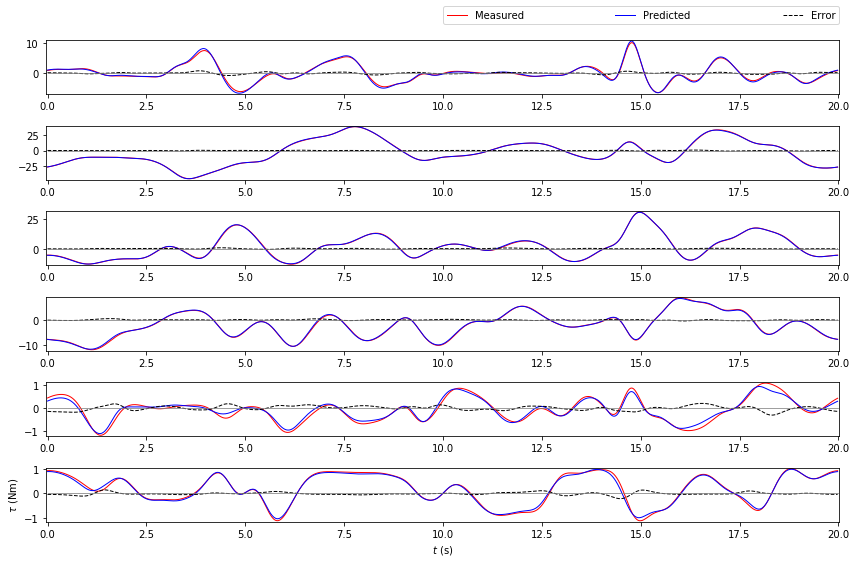

In [103]:
from support_funcs.regr_data_proc import  plot_meas_pred_tau

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

proc = numpy.load(tmpfolder + 'procdata/' + indentification_traj + '_proc.npz')
t = proc['t']
tau = proc['tau']

tau_p = np.zeros(tau.shape)
tau_ps = W.dot(beta_ols)
for i in range(dof):
    tau_p[:, i] = tau_ps[i::dof].flatten()

base_freq = 0.05    
trajectory_sampling_rate = 50
plot_data_num = int(1 / base_freq * trajectory_sampling_rate)
plot_meas_pred_tau(t[:plot_data_num], tau[:plot_data_num, :],
                   tau_p[:plot_data_num, :])

## Weighted Least Square (WLS)

In [104]:
proc = numpy.load(tmpfolder + 'procdata/' + indentification_traj + '_proc.npz')
t = proc['t']
tau = proc['tau']

weight = np.max(tau, axis=0) - np.min(tau, axis=0)
print("weight: ")
print(weight)


# repeat the weight to generate a large vecoter for all the data
weights = 1.0/np.tile(weight, W.shape[0]/weight.shape[0])

weight: 
[16.54796468 83.1114178  44.07558209 20.66063401  2.26117676  2.14112204]


In [105]:
weights[0:6]

array([0.06043039, 0.01203204, 0.0226883 , 0.04840123, 0.4422476 ,
       0.46704484])

In [106]:
W_wls = np.multiply(W, np.asmatrix(weights).transpose())
omega_wls = np.multiply(omega.T, weights).T
Q1_wls,R1_wls = numpy.linalg.qr(W_wls)
rho1_wls = Q1_wls.T*omega_wls

In [107]:
%time beta_wls = (R1_wls.T * R1_wls).I * R1_wls.T * rho1_wls

CPU times: user 15 ms, sys: 72 µs, total: 15 ms
Wall time: 11.3 ms


In [108]:
numpy.savetxt(tmpfolder + 'solutions/' + indentification_traj + '_beta_wls.dat', beta_wls)

In [109]:
rho2_norm_sqr_wls = numpy.linalg.norm(omega_wls - W_wls * beta_wls)**2

### plot measured and predicted torque

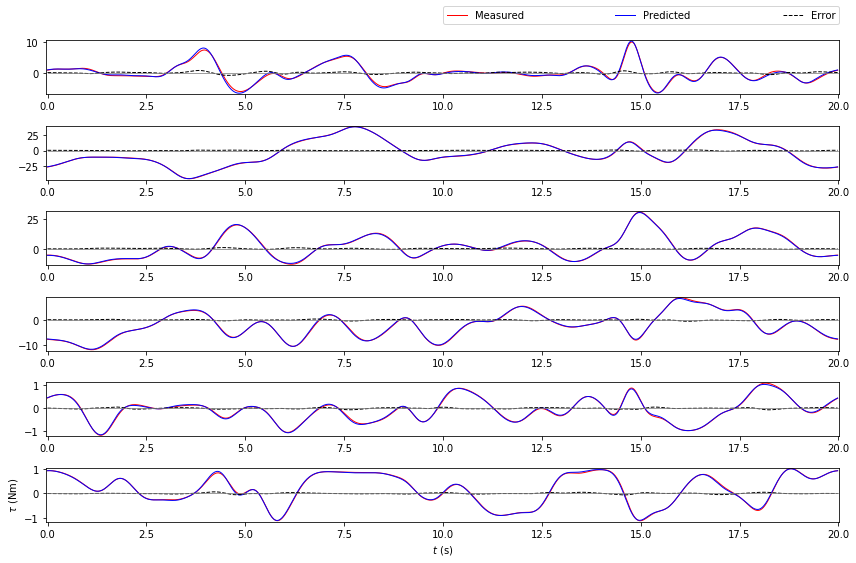

In [110]:
from support_funcs.regr_data_proc import  plot_meas_pred_tau

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

proc = numpy.load(tmpfolder + 'procdata/' + indentification_traj + '_proc.npz')
t = proc['t']
tau = proc['tau']

tau_p = np.zeros(tau.shape)
tau_ps = W.dot(beta_wls)
for i in range(dof):
    tau_p[:, i] = tau_ps[i::dof].flatten()

base_freq = 0.05    
trajectory_sampling_rate = 50
plot_data_num = int(1 / base_freq * trajectory_sampling_rate)
plot_meas_pred_tau(t[:plot_data_num], tau[:plot_data_num, :],
                   tau_p[:plot_data_num, :])

### Base Parameter Feasibility Test (BPFT) of OLS Solution

In [111]:
dict_subs = dict(zip(beta_symbs, beta_wls.flatten().tolist()[0]))
lmis_ols_bpft = [ lmi_sdp.LMI_PD(mrepl(lmi.canonical().gts, dict_subs)) for lmi in DB_LMIs ]

In [112]:
lmis_ols_bpft[0]

Matrix([
[L_1xx, L_1xy,                                                                                                                                    L_1xz,     0,  l_1z, -l_1y],
[L_1xy, L_1yy,                                                                                                                                    L_1yz, -l_1z,     0,  l_1x],
[L_1xz, L_1yz, -L_2yy + 0.04992*l_2z - 0.0006230016*m_2 - 0.0162755137*m_3 - 0.0162755137*m_4 - 0.0162755137*m_5 - 0.0162755137*m_6 + 0.181117315865966,  l_1y, -l_1x,     0],
[    0, -l_1z,                                                                                                                                     l_1y,   m_1,     0,     0],
[ l_1z,     0,                                                                                                                                    -l_1x,     0,   m_1,     0],
[-l_1y,  l_1x,                                                                                                      

In [113]:
variables_ols_bpft = list(delta_d)
objf_ols_bpft = 0  # no objective function - "find" problem

Testing with all solvers

**Just one of the following calls is sufficient to show feasibility/infeasibility**

In [114]:
sol = sdpa_file(objf_ols_bpft, lmis_ols_bpft, variables_ols_bpft) # One can solve the output file at http://www.neos-server.org/neos/solvers/sdp:DSDP/SDPA.html for example.

SDPA file saved at: tmp/sdpa_dat/sdpa_input.dat-s


In [115]:
sol = dsdp5(objf_ols_bpft, lmis_ols_bpft, variables_ols_bpft)

sdp.dat-s -save dsdp5.out -gaptol 1e-07 

Variables 24 
Matrix Blocks: 6, Total Number of Constraints: 36 
Nonzeros in Constraints: 178

Read Data File into Buffer:      9.899e-04 seconds
DSDP Set Data:                   6.080e-04 seconds
DSDP Process Data:               9.326e-03 seconds

Data Norms: C: 6.85e+00, A: 9.81e+00, b: 0.00e+00
Scale C: 1.00e+00

Potential Parameter: 5.00
Reapply Schur matrix: 10

Iter   PP Objective      DD Objective    PInfeas   DInfeas     Nu     StepLength   Pnrm
---------------------------------------------------------------------------------------
0     1.00000000e+10   -1.53342524e+12   1.0e+00   1.5e+04   1.5e+12  0.00  0.00   0.00 
10    5.36956780e+11   -6.30224177e+09   3.7e+03   6.3e+01   2.2e+08  1.00  1.00  23.18 
20   -1.18598665e+06   -1.18943666e+06   2.1e+03   1.2e-02   1.2e+00  0.45  1.00   0.78 
30   -1.18942087e+06   -1.18942087e+06   3.9e+02   1.2e-02   3.9e-06  1.00  0.02  32.98 
DSDP Converged. 
DSDP Primal Unbounded, Dual Infeasible


In [116]:
sol = sdpa(objf_ols_bpft, lmis_ols_bpft, variables_ols_bpft)

SDPA (Version 7.3.9) start at [Thu Nov 22 19:21:22 2018]
set   is STABLE_BUT_SLOW
data  is tmp/sdpa_dat/sdp.dat-s : sparse
out   is tmp/sdpa_dat/sdpa.out
NumThreads  is set as 1
Schur computation : DENSE 
Entering DMUMPS driver with JOB, N, NZ =  -2           0              0
   mu      thetaP  thetaD  objP      objD      alphaP  alphaD  beta 
 0 1.0e+08 1.0e+00 1.0e+00 -0.00e+00 -2.16e+04 6.3e-01 6.7e-01 3.00e-01
 1 5.0e+07 3.7e-01 3.3e-01 -0.00e+00 -1.11e+05 6.7e-01 7.2e-01 3.00e-01
 2 2.2e+07 1.2e-01 9.2e-02 -0.00e+00 -1.65e+05 6.5e-01 6.8e-01 3.00e-01
 3 1.1e+07 4.3e-02 2.9e-02 -0.00e+00 -2.11e+05 6.6e-01 7.2e-01 3.00e-01
 4 5.0e+06 1.5e-02 8.1e-03 -0.00e+00 -2.79e+05 7.5e-01 7.8e-01 3.00e-01
 5 1.8e+06 3.7e-03 1.8e-03 -0.00e+00 -3.87e+05 7.9e-01 7.8e-01 3.00e-01
 6 5.6e+05 7.7e-04 3.9e-04 -0.00e+00 -5.38e+05 7.9e-01 8.0e-01 3.00e-01
 7 1.9e+05 1.6e-04 7.8e-05 -0.00e+00 -7.07e+05 7.5e-01 8.0e-01 3.00e-01
 8 7.3e+04 4.1e-05 1.6e-05 -0.00e+00 -6.97e+05 7.2e-01 8.0e-01 3.00e-01
 9 2.9

In [135]:
sol = csdp(objf_ols_bpft, lmis_ols_bpft, variables_ols_bpft)

This is a pure dual feasibility problem.
Iter:  0 Ap: 0.00e+00 Pobj: -3.8296290e+03 Ad: 0.00e+00 Dobj:  0.0000000e+00 
Iter:  1 Ap: 8.96e-01 Pobj: -5.2770492e+03 Ad: 8.16e-01 Dobj:  0.0000000e+00 
Iter:  2 Ap: 6.30e-01 Pobj: -4.7758728e+03 Ad: 6.04e-01 Dobj:  0.0000000e+00 
Iter:  3 Ap: 5.03e-01 Pobj: -4.1867025e+03 Ad: 8.53e-01 Dobj:  0.0000000e+00 
Iter:  4 Ap: 8.74e-01 Pobj: -1.5539887e+03 Ad: 4.75e-01 Dobj:  0.0000000e+00 
Iter:  5 Ap: 3.90e-01 Pobj:  2.5868012e+00 Ad: 2.09e-01 Dobj:  0.0000000e+00 
Iter:  6 Ap: 8.83e-02 Pobj:  2.6946911e+03 Ad: 1.83e-01 Dobj:  0.0000000e+00 
Iter:  7 Ap: 3.62e-03 Pobj:  8.0058280e+03 Ad: 1.06e-02 Dobj:  0.0000000e+00 
Iter:  8 Ap: 1.61e-02 Pobj:  6.0199514e+04 Ad: 1.30e-02 Dobj:  0.0000000e+00 
Iter:  9 Ap: 6.67e-03 Pobj:  2.9195543e+05 Ad: 8.91e-03 Dobj:  0.0000000e+00 
Iter: 10 Ap: 4.86e-03 Pobj:  1.5474164e+06 Ad: 7.36e-03 Dobj:  0.0000000e+00 
Iter: 11 Ap: 7.92e-04 Pobj:  3.2963353e+06 Ad: 1.12e-02 Dobj:  0.0000000e+00 
Iter: 12 Ap: 1.26e-03 P

In [144]:
sol = cvxopt_conelp(objf_ols_bpft, lmis_ols_bpft, variables_ols_bpft)

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -1.2158e+01  1e+02  2e+00  7e+00  1e+00
 1:  0.0000e+00 -2.3016e-01  3e+00  2e-01  6e-01  8e-01
 2:  0.0000e+00 -9.6107e-02  1e+00  6e-02  2e-01  3e-01
 3:  0.0000e+00  2.0962e-01  4e+01  3e-01  1e+00  2e+00
 4:  0.0000e+00  7.3312e-01  3e+01  1e-01  5e-01  2e+00
 5:  0.0000e+00  4.7892e-01  2e+01  7e-02  3e-01  1e+00
 6:  0.0000e+00  3.4714e+00  1e+02  6e-02  2e-01  4e+00
 7:  0.0000e+00  1.1664e+01  3e+02  6e-02  2e-01  1e+01
 8:  0.0000e+00  1.0313e+02  2e+03  5e-02  2e-01  1e+02
 9:  0.0000e+00  1.7208e+03  4e+04  5e-02  2e-01  2e+03
10:  0.0000e+00  1.3030e+04  3e+05  5e-02  2e-01  1e+04
11:  0.0000e+00  9.8979e+04  2e+06  5e-02  2e-01  1e+05
12:  0.0000e+00  3.6891e+05  8e+06  5e-02  2e-01  4e+05
13:  0.0000e+00  9.4734e+05  2e+07  5e-02  2e-01  9e+05
14:  0.0000e+00  1.0511e+06  3e+07  5e-02  2e-01  1e+06
15:  0.0000e+00  1.0467e+07  3e+08  5e-02  2e-01  1e+07
Certificate of primal infeasibility found.
primal 

## Base Parameter Feasibility Correction (BPFC)     ($\beta^\prime$)

In [117]:
u = sympy.Symbol('u')
U_beta = BlockMatrix([[Matrix([u]),            (beta_wls - beta_symbs).T],
                 [beta_wls - beta_symbs,                 I(n_beta)]])
U_beta = U_beta.as_explicit()

In [118]:
lmis_ols_bpfc = [LMI(U_beta)] + DB_LMIs_marg

In [119]:
lmis_ols_bpfc[1]

Matrix([
[L_1xx, L_1xy,                                                                                                                        L_1xz,     0,  l_1z, -l_1y],
[L_1xy, L_1yy,                                                                                                                        L_1yz, -l_1z,     0,  l_1x],
[L_1xz, L_1yz, -L_2yy + beta1 + 0.04992*l_2z - 0.0006230016*m_2 - 0.0162755137*m_3 - 0.0162755137*m_4 - 0.0162755137*m_5 - 0.0162755137*m_6,  l_1y, -l_1x,     0],
[    0, -l_1z,                                                                                                                         l_1y,   m_1,     0,     0],
[ l_1z,     0,                                                                                                                        -l_1x,     0,   m_1,     0],
[-l_1y,  l_1x,                                                                                                                            0,     0,     0,   m_1]]) >= Matrix([


In [120]:
variables_ols_bpfc = [u] + list(beta_symbs) + list(delta_d)

In [121]:
objf_ols_bpfc = u

In [122]:
sol_ols_bpfc = solve_sdp(objf_ols_bpfc, lmis_ols_bpfc, variables_ols_bpfc)

sdp.dat-s -save dsdp5.out -gaptol 1e-07 

Variables 61 
Matrix Blocks: 7, Total Number of Constraints: 73 
Nonzeros in Constraints: 323

Read Data File into Buffer:      4.501e-04 seconds
DSDP Set Data:                   1.068e-04 seconds
DSDP Process Data:               6.552e-04 seconds

Data Norms: C: 7.98e+00, A: 1.58e+01, b: 1.00e+00
Scale C: 1.00e+00

Potential Parameter: 5.00
Reapply Schur matrix: 4

Iter   PP Objective      DD Objective    PInfeas   DInfeas     Nu     StepLength   Pnrm
---------------------------------------------------------------------------------------
0     1.00000000e+10   -4.31490293e+12   2.0e+00   4.3e+04   4.3e+12  0.00  0.00   0.00 
10    6.50336738e+13   -1.73609672e+13   3.7e+05   1.7e+05   2.0e+11  1.00  1.00   5.93 
20    9.99414360e+10   -2.06612911e+10   9.5e+02   2.1e+02   3.7e+08  1.00  1.00   1.20 
30    6.60957840e+08   -4.15396223e+07   4.7e+00   3.3e-01   2.3e+06  1.00  1.00   0.89 
40    1.50833030e+06   -1.03637529e+05   3.3e-03   0.0e+0

In [123]:
u_prime = sol_ols_bpfc[0,0]
beta_prime = sol_ols_bpfc[1:1+n_beta]
delta_d_prime = sol_ols_bpfc[1+n_beta:]

In [124]:
u_prime

0.0007298423215906154

### plot measured and predicted torque

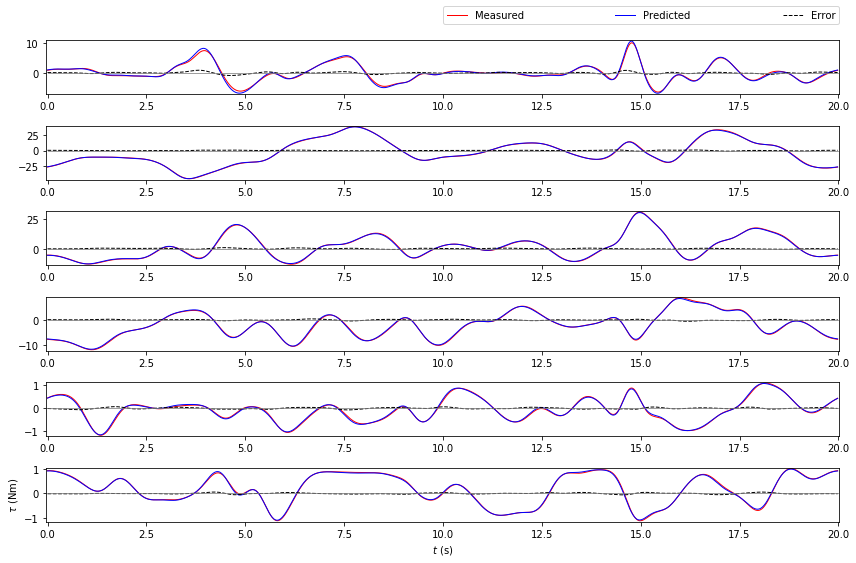

In [125]:
# from support_funcs.regr_data_proc import  plot_meas_pred_tau

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

proc = numpy.load(tmpfolder + 'procdata/' + indentification_traj + '_proc.npz')
t = proc['t']
tau = proc['tau']

tau_p = np.zeros(tau.shape)
tau_ps = W.dot(beta_prime)
for i in range(dof):
    tau_p[:, i] = tau_ps[i::dof].flatten()

base_freq = 0.05    
trajectory_sampling_rate = 50
plot_data_num = int(1 / base_freq * trajectory_sampling_rate)
plot_meas_pred_tau(t[:plot_data_num], tau[:plot_data_num, :],
                   tau_p[:plot_data_num, :])

### Solution Double Check

In [126]:
dict_subs = dict(zip(beta_symbs, beta_prime.flatten().tolist()[0]))
dict_subs.update(dict(zip(delta_d, delta_d_prime.flatten().tolist()[0])))

test = 'ok'
for i, DBi in enumerate(DB_blocks):
        m = numpy.matrix(mrepl(DBi, dict_subs)).astype(float)
        for v in numpy.linalg.eigvals( m ):
            if v <= 0.0:
                print i, v
                test = 'fail'
print(test)

ok


In [127]:
numpy.savetxt(tmpfolder + 'solutions/' + indentification_traj + '_beta_prime.dat', beta_prime)

## Feasible Base Parameter Estimation with Weight Least Squares (FBPE-WLS)     ($\beta^\star$)

In [128]:
u = sympy.Symbol('u')
U_rho = BlockMatrix([[Matrix([u - rho2_norm_sqr_wls]), (rho1_wls - R1_wls*beta_symbs).T],
                     [rho1_wls - R1_wls*beta_symbs,                       I(n_beta)]])
U_rho = U_rho.as_explicit()

In [129]:
lmis_fbpe_ols = [LMI(U_rho)] + DB_LMIs_marg

In [130]:
variables_fbpe_ols = [u] + list(beta_symbs) + list(delta_d)

In [131]:
objf_fbpe_ols = u

In [132]:
sol_fbpe_ols = solve_sdp(objf_fbpe_ols, lmis_fbpe_ols, variables_fbpe_ols)

sdp.dat-s -save dsdp5.out -gaptol 1e-07 

Variables 61 
Matrix Blocks: 7, Total Number of Constraints: 73 
Nonzeros in Constraints: 954

Read Data File into Buffer:      1.516e-03 seconds
DSDP Set Data:                   1.619e-04 seconds
DSDP Process Data:               2.650e-03 seconds

Data Norms: C: 4.22e+01, A: 5.95e+02, b: 1.00e+00
Scale C: 1.00e+00

Potential Parameter: 5.00
Reapply Schur matrix: 4

Iter   PP Objective      DD Objective    PInfeas   DInfeas     Nu     StepLength   Pnrm
---------------------------------------------------------------------------------------
0     1.00000000e+10   -6.36768885e+14   2.0e+00   6.4e+06   6.4e+14  0.00  0.00   0.00 
10    3.67077269e+11   -5.84553886e+10   2.4e+03   5.8e+02   9.4e+08  1.00  1.00   3.16 
20    5.57323957e+08   -2.25636253e+07   3.5e+00   1.4e-01   2.0e+06  1.00  1.00   0.99 
30    9.70543665e+04   -4.75653063e+03   2.1e-04   0.0e+00   2.9e+02  1.00  1.00   0.44 
40    2.54081952e+02   -8.97665056e+00   5.4e-07   0.0e+0

In [133]:
u_star = sol_fbpe_ols[0,0]
beta_star = numpy.matrix(sol_fbpe_ols[1:1+n_beta])
delta_d_star = numpy.matrix(sol_fbpe_ols[1+n_beta:])

In [134]:
u_star

1.7263569112647936

### plot measured and predicted torque

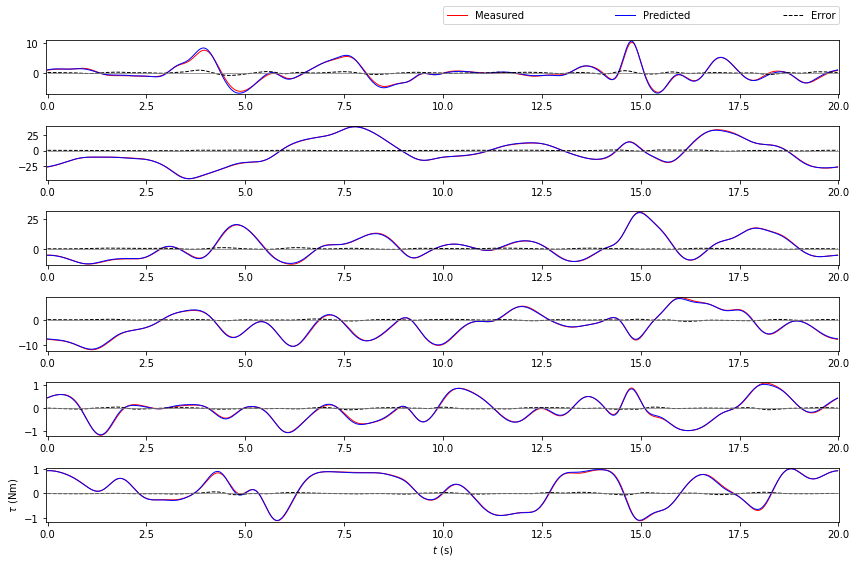

In [135]:
# from support_funcs.regr_data_proc import  plot_meas_pred_tau

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

proc = numpy.load(tmpfolder + 'procdata/' + indentification_traj + '_proc.npz')
t = proc['t']
tau = proc['tau']

tau_p = np.zeros(tau.shape)
tau_ps = W.dot(beta_star)
for i in range(dof):
    tau_p[:, i] = tau_ps[i::dof].flatten()

base_freq = 0.05    
trajectory_sampling_rate = 50
plot_data_num = int(1 / base_freq * trajectory_sampling_rate)
plot_meas_pred_tau(t[:plot_data_num], tau[:plot_data_num, :],
                   tau_p[:plot_data_num, :])

### Solution Double Check

In [136]:
dict_subs = dict(zip(beta_symbs, beta_star.flatten().tolist()[0]))
dict_subs.update(dict(zip(delta_d, delta_d_star.flatten().tolist()[0])))

test = 'ok'
for DBi in DB_blocks:
        m = numpy.matrix(mrepl(DBi, dict_subs)).astype(float)
        for v in numpy.linalg.eigvals( m ):
            if v <= 0.0:
                print(v)
                test = 'fail'
print(test)

ok


In [137]:
numpy.savetxt(tmpfolder + 'solutions/' + indentification_traj + '_beta_star.dat', beta_star)

## Additional Constraints on Centers-of-Mass    ($\beta^{\star e}$)

In [138]:
link_cuboid_hulls = [
[[ -0.010 , +0.010 ],[ -0.010 , +0.010 ],[ -0.10 , +0.10 ]],
[[ -0.10 , +0.10 ],[ -0.010 , +0.010 ],[ -0.010 , +0.010 ]],
[[ -0.20 , +0.30 ],[ -0.020 , +0.020 ],[ -0.030 , +0.030 ]],
[[ -0.20 , +0.30 ],[ -0.010 , +0.010 ],[ -0.030 , +0.030 ]],
[[ -0.01 , +0.01 ],[ -0.01 , +0.01 ],[ -0.01 , +0.01 ]],
[[ -0.10 , +0.10 ],[ -0.010 , +0.010 ],[ -0.050 , +0.050 ]],
]

link_mass = [
[ 1.50 , 2.50 ],
[ 3.50 , 4.50 ],
[ 4.50 , 5.50 ],
[ 3.50 , 4.50 ],
[ 0.0001 , 0.01 ],
[ 1.50 , 2.50 ]
]

robotmaxmass = 18.0

#### LMI Matrix Definition

In [139]:
D_add_blocks = []
for i in range(rbt.dof):
    l = rbt.rbtdef.l[i]
    m = rbt.rbtdef.m[i]
    link_cuboid_hull = link_cuboid_hulls[i]
    D_add_blocks.append(Matrix([[m - link_mass[i][0]]]))
    D_add_blocks.append(Matrix([[link_mass[i][1] - m]]))
    for j in range(3):
        D_add_blocks.append( Matrix( [[  l[j] - m*link_cuboid_hull[j][0] ]] ) )
        D_add_blocks.append( Matrix( [[ -l[j] + m*link_cuboid_hull[j][1] ]] ) )

D_add_blocks.append(Matrix([robotmaxmass - sum(rbt.rbtdef.m)]))

#### Variable Change and LMI Definition

In [140]:
DB_add_blocks = [ mrepl(Di, varchange_dict) for Di in D_add_blocks ]

In [141]:
DB_add_LMIs = list(map(LMI_PD, DB_add_blocks))

In [142]:
DB_add_LMIs_marg = list(map(lambda lm: LMI(lm, epsilon_safemargin*eye(lm.shape[0])) , DB_add_blocks))

In [143]:
DB_add_LMIs_marg[15]

Matrix([[-l_2z + 0.01*m_2]]) >= Matrix([[1.0e-6]])

In [144]:
DB_add_LMIs_marg[-1]

Matrix([[-m_1 - m_2 - m_3 - m_4 - m_5 - m_6 + 18.0]]) >= Matrix([[1.0e-6]])

### Testing $\beta^\star$ solution on new constraints

In [145]:
dict_subs = dict(zip(beta_symbs, beta_star.flatten().tolist()[0]))
lmis_star_bpft_add = [ lmi_sdp.LMI_PD(mrepl(lmi.canonical().gts, dict_subs)) for lmi in DB_add_LMIs_marg ]
variables_star_bpft_add = list(delta_d)
objf_star_bpft_add = delta_d[0]

In [146]:
sol_star_bpft_add = solve_sdp(objf_star_bpft_add, lmis_star_bpft_add, variables_star_bpft_add)

sdp.dat-s -save dsdp5.out -gaptol 1e-07 

Variables 24 
Matrix Blocks: 49, Total Number of Constraints: 49 
Nonzeros in Constraints: 153

Read Data File into Buffer:      4.060e-04 seconds
DSDP Set Data:                   3.569e-04 seconds
DSDP Process Data:               3.910e-04 seconds

Data Norms: C: 2.19e+01, A: 6.59e+00, b: 1.00e+00
Scale C: 3.05e-01

Potential Parameter: 5.00
Reapply Schur matrix: 10

Iter   PP Objective      DD Objective    PInfeas   DInfeas     Nu     StepLength   Pnrm
---------------------------------------------------------------------------------------
0     1.00000000e+10   -1.39204322e+12   2.0e+00   1.4e+04   1.4e+12  0.00  0.00   0.00 
10    9.88845377e+06    9.88797810e+06   1.0e+08   1.1e-03   2.6e-02  1.00  1.00  873.11 
14    9.88797914e+06    9.88797912e+06   1.0e+08   1.1e-03   4.7e-05  1.00  0.01  75.19 
DSDP Converged. 
DSDP Primal Unbounded, Dual Infeasible

P Objective  :  -1.12020869e+05 
DSDP Solution:   1.00000000e+07 

DSDP Solve Time:   

### Finding new solution

In [147]:
lmis_fbpe_ols_add = [LMI(U_rho)] + DB_LMIs_marg + DB_add_LMIs_marg

In [148]:
variables_fbpe_ols_add = [u] + list(beta_symbs) + list(delta_d)

In [149]:
objf_fbpe_ols_add = u

In [150]:
sol_fbpe_ols_add = solve_sdp(objf_fbpe_ols_add, lmis_fbpe_ols_add, variables_fbpe_ols_add)

sdp.dat-s -save dsdp5.out -gaptol 1e-07 

Variables 61 
Matrix Blocks: 56, Total Number of Constraints: 122 
Nonzeros in Constraints: 1127

Read Data File into Buffer:      1.629e-03 seconds
DSDP Set Data:                   1.700e-04 seconds
DSDP Process Data:               2.196e-03 seconds

Data Norms: C: 4.73e+01, A: 5.95e+02, b: 1.00e+00
Scale C: 1.00e+00

Potential Parameter: 5.00
Reapply Schur matrix: 4

Iter   PP Objective      DD Objective    PInfeas   DInfeas     Nu     StepLength   Pnrm
---------------------------------------------------------------------------------------
0     1.00000000e+10   -6.35691524e+14   2.0e+00   6.4e+06   6.4e+14  0.00  0.00   0.00 
10    2.77964007e+10   -8.17883364e+09   1.5e+02   8.2e+01   7.3e+07  1.00  1.00   1.97 
20    1.48926868e+07   -4.39827723e+05   1.2e-02   2.2e-03   2.3e+04  0.45  1.00   0.29 
30    2.54773605e+04   -2.94963675e+02   1.9e-05   0.0e+00   6.3e+00  1.00  1.00  10.09 
40    7.44192060e+01   -3.35988367e+00   5.7e-08   0.0

In [151]:
u_starextra = sol_fbpe_ols_add[0,0]
beta_starextra = numpy.matrix(sol_fbpe_ols_add[1:1+n_beta])
delta_d_starextra = numpy.matrix(sol_fbpe_ols_add[1+n_beta:])

In [152]:
u_starextra

1.8058719690529201

### plot measured and predicted torque

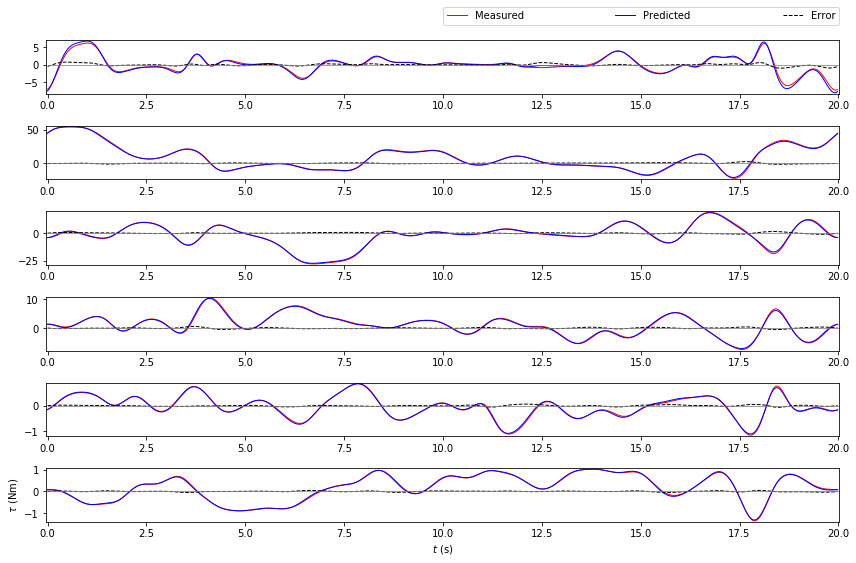

In [155]:
# from support_funcs.regr_data_proc import  plot_meas_pred_tau

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

traj = 'traj3'
proc = numpy.load(tmpfolder + 'procdata/' + traj + '_proc.npz')  #indentification_
t = proc['t']
tau = proc['tau']

regr_mats = numpy.load(tmpfolder + 'procdata/' + traj + '_regr.npz')
W1 = numpy.matrix(regr_mats['W'])

tau_p = np.zeros(tau.shape)
tau_ps = W1.dot(beta_starextra)
for i in range(dof):
    tau_p[:, i] = tau_ps[i::dof].flatten()

base_freq = 0.05    
trajectory_sampling_rate = 50
plot_data_num = int(1 / base_freq * trajectory_sampling_rate)
plot_meas_pred_tau(t[:plot_data_num], tau[:plot_data_num, :],
                   tau_p[:plot_data_num, :])

### Solution Double Check

In [156]:
dict_subs = dict(zip(beta_symbs, beta_starextra.flatten().tolist()[0]))
dict_subs.update(dict(zip(delta_d, delta_d_starextra.flatten().tolist()[0])))

test = 'ok'
for DBi in (DB_blocks + DB_add_blocks):
        m = numpy.matrix(mrepl(DBi, dict_subs)).astype(float)
        for v in numpy.linalg.eigvals( m ):
            if v <= 0.0: test = 'fail'
print(test)

ok


In [157]:
numpy.savetxt(tmpfolder + 'solutions/' + indentification_traj + '_beta_starextra.dat', beta_starextra)

### Inertia Matrix Definiteness Tests

In [158]:
def test_mass_matrix_psd(beta_solution):
    K = rbt.dyn.Pb.T + rbt.dyn.Kd * rbt.dyn.Pd.T
    A = numpy.matrix(K).astype(float)
    b = numpy.matrix(beta_solution).astype(float)
    x = numpy.linalg.pinv(A) * b
    d_test = x
    
    M_func_def = sympybotics.robotcodegen.robot_code_to_func( 'python', rbt.M_code, 'M', 'M_func', rbt.rbtdef)
    exec(M_func_def, globals())
    global sin, cos
    from math import sin, cos
    
    ntests = 10000
    
    ok = 0
    nok = 0
    for i in range(ntests):
        q_test = numpy.random.rand(rbt.dof)
        M_out = M_func( numpy.array(d_test).flatten().tolist(), q_test)
        M = numpy.matrix(M_out).reshape((rbt.dof,rbt.dof))
        try:
            c = numpy.linalg.cholesky(M)
        except:
            nok += 1
            continue
        ok += 1
        
    print 'ok     %8i  %3i%%'%(ok, 100.0*ok/ntests) 
    print 'not ok %8i  %3i%%'%(nok, 100.0*nok/ntests)
    if nok > 0 :
        print('\nNot PSD -> Not feasible!')
    else:
        print('\nSeems feasible.')

In [159]:
beta_ols = numpy.matrix(numpy.loadtxt(tmpfolder + 'solutions/traj1_beta_ols.dat')).T
test_mass_matrix_psd(beta_ols)

ok         7731   77%
not ok     2269   22%

Not PSD -> Not feasible!


In [160]:
beta_wls = numpy.matrix(numpy.loadtxt(tmpfolder + 'solutions/traj1_beta_wls.dat')).T
test_mass_matrix_psd(beta_wls)

ok        10000  100%
not ok        0    0%

Seems feasible.


In [161]:
beta_prime = numpy.matrix(numpy.loadtxt(tmpfolder + 'solutions/traj1_beta_prime.dat')).T
test_mass_matrix_psd(beta_prime)

ok        10000  100%
not ok        0    0%

Seems feasible.


In [162]:
beta_star = numpy.matrix(numpy.loadtxt(tmpfolder + 'solutions/traj1_beta_star.dat')).T
test_mass_matrix_psd(beta_star)

ok        10000  100%
not ok        0    0%

Seems feasible.


In [163]:
beta_starextra = numpy.matrix(numpy.loadtxt(tmpfolder + 'solutions/traj1_beta_starextra.dat')).T
test_mass_matrix_psd(beta_starextra)

ok        10000  100%
not ok        0    0%

Seems feasible.


5 - Regression Model Validation
====================================================

In [164]:
import numpy as np
import sympybotics
import pickle

from collections import OrderedDict
from support_funcs.utils import ListTable

In [165]:
with open(tmpfolder +  'robotmodels/ljhn_'+leg+'_model.pkl', 'rb' ) as file:
          rbt = pickle.load( file )

In [166]:
def analyse(W, omega, R1, beta):
    from numpy import matrix, mean
    from numpy.linalg import cond, norm
    
    p = dict()
    
    n = W.shape[0]
    
    omega_norm = norm(omega)
    omega_mean = mean(omega)
    
    p['err'] = norm(omega - W * beta)
    p['merr'] = p['err'] / n
    
    p['se'] = p['err']**2
    p['mse'] = p['se']/(n-W.shape[1])
    p['rmse'] = p['mse']**0.5
    
    C = p['mse'] * (R1.T * R1).I
    p['sd'] = np.sqrt(C.diagonal()).T
    p['sd%'] = 100. * p['sd'] / np.abs(beta)
    
    p['relerr'] = p['err']/ omega_norm
    p['relerr%'] = p['relerr']*100.
    
    p['1-r2'] = p['err']**2 / norm(omega - omega_mean)**2
    p['r2'] = 1 - p['1-r2']

    return p
    

In [167]:
# trajs = OrderedDict([('id', 'traj1'),
#                      ('vA', 'traj2'),
#                      ('vB', 'traj3'),
#                      ('vC', 'traj4')])

trajs = OrderedDict([('id', 'traj1'),
                     ('vA', 'traj2'),
                     ('vB', 'traj3')
#                     , ('vC', 'traj4')
                    ])

betas = OrderedDict([('beta_ols', 'B^'),
                     ('beta_wls', 'B~'),
                     ('beta_prime', 'B\''),
                     ('beta_star', 'B*'),
                     ('beta_starextra', 'B*e')])

In [168]:
solutions_beta = {betaname:np.matrix(np.loadtxt(tmpfolder + 'solutions/%s_%s.dat'%(trajs['id'], betaname))).T for betaname in betas}

In [169]:
analysis = dict()

for traj in trajs:
    from numpy.linalg import cond
    
    print(traj)
    
    analysis[traj] = dict()
    
    regr_mats = np.load(tmpfolder + 'procdata/' + trajs[traj] + '_regr.npz')
    W = np.matrix(regr_mats['W'])
    omega = np.matrix(regr_mats['omega'])
    R1 = np.matrix(regr_mats['R1'])
    
    analysis[traj]['cond'] = cond(W)
    
    analysis[traj]['betas'] = dict()
    
    for betaname in betas:
        beta = solutions_beta[betaname]
        analysis[traj]['betas'][betaname] = analyse(W, omega, R1, beta)
    
    del W, omega, R1

id
vA
vB


In [170]:
prop = lambda x: x['relerr%']
form = '%.2f'

table = ListTable()
table.append([''] + ['cond'] + betas.values())
for (traj, trajname) in zip(trajs, ['identification', 'validation A', 'validation B', 'validation C']):
    row = [traj] + ['%.0f'%analysis[traj]['cond']] + [ form%prop(analysis[traj]['betas'][b]) for b in betas]
    table.append(row)
table

,cond,B^,B~,B',B*,B*e
id,11,2.26,2.63,2.66,2.71,2.79
vA,13,3.30,3.21,3.29,3.28,3.46
vB,15,3.25,3.25,3.31,3.44,3.53


In [171]:
import yaml, sympy
with open(datafolder + 'robotparams/ljhn_'+leg+'_cad.yml', 'r') as f:
    ljhn_leftleg_cad = yaml.load(f)
delta_cad = sympy.Matrix([ljhn_leftleg_cad.get(str(d), d) for d in rbt.dyn.dynparms])
beta_cad = (rbt.dyn.Pb.T + rbt.dyn.Kd * rbt.dyn.Pd.T) * delta_cad

### plot measured and predicted torque

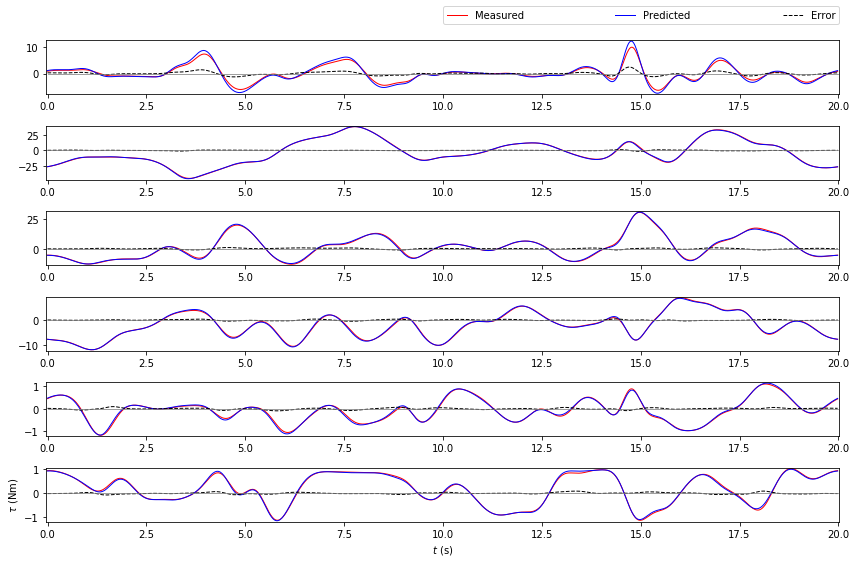

In [172]:
# from support_funcs.regr_data_proc import  plot_meas_pred_tau

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

traj = 'traj1'
proc = numpy.load(tmpfolder + 'procdata/' + traj + '_proc.npz')
t = proc['t']
tau = proc['tau']

regr_mats = numpy.load(tmpfolder + 'procdata/' + traj + '_regr.npz')
W1 = numpy.matrix(regr_mats['W'])

tau_p = np.zeros(tau.shape)
tau_ps = W1.dot(numpy.matrix(beta_cad).astype(float64))
for i in range(dof):
    tau_p[:, i] = tau_ps[i::dof].flatten()

base_freq = 0.05    
trajectory_sampling_rate = 50
plot_data_num = int(1 / base_freq * trajectory_sampling_rate)
plot_meas_pred_tau(t[:plot_data_num], tau[:plot_data_num, :],
                   tau_p[:plot_data_num, :])

### $\beta^{cad}$  Double Check

In [173]:
def  test_lmi_matrix_psd(delta_solution):
    dict_subs = dict(zip(delta, delta_solution))

    test = 'ok'
    for Di in D_blocks:
            m = numpy.matrix(mrepl(Di, dict_subs)).astype(float)
            for v in numpy.linalg.eigvals( m ):
                if v <= 0.0:
                    print(v)
                    test = 'fail'
    print(test)

In [174]:
test_lmi_matrix_psd(delta_cad)

ok


In [175]:
test_mass_matrix_psd(beta_cad)

ok        10000  100%
not ok        0    0%

Seems feasible.


In [176]:
form = '%.4g'

import sympy

table = ListTable()
header = ['', 'Bcad', 'B^', '% std dev B^', 'B*ext']
table.append(header)
for i, b in enumerate(rbt.dyn.baseparms.n()):
    if beta_cad[i].is_Number:
        cad_v = sympy.N(beta_cad[i], 4)
    elif beta_cad[i].is_Symbol:
        cad_v = '---'
    else:
        cad_v = sympy.N(beta_cad[i], 4)
    row = ['%.7s ...'%b if len(str(b)) > 137 else str(b), cad_v]
    row += [form%solutions_beta['beta_ols'][i,0], '%.2g'%analysis['id']['betas']['beta_ols']['sd%'][i,0]]
    row += [form%solutions_beta['beta_starextra'][i,0]]
    table.append(row)
table

,Bcad,B^,% std dev B^,B*ext
L_1zz + L_2yy - 0.04992*l_2z + 0.0006230016*m_2 + 0.0162755137*m_3 + 0.0162755137*m_4 + 0.0162755137*m_5 + 0.0162755137*m_6,0.2179,0.1976,1.1,0.1963
L_2xx - ...,0.8671,0.76,0.38,0.7717
L_2xy + 0.12511*l_3z - 0.12511*l_4z - 0.12511*l_5z - 0.0095871793*m_3 - 0.0095871793*m_4 - 0.0095871793*m_5 - 0.0095871793*m_6,-0.1245,-0.1177,1,-0.1216
L_2xz,-0.0004717,-0.003007,59,-0.007611
L_2yz,-3.326e-5,0.02173,7.2,0.002856
L_2zz + ...,1.271,1.178,0.26,1.176
l_2x + 0.12511*m_3 + 0.12511*m_4 + 0.12511*m_5 + 0.12511*m_6,1.629,1.636,0.04,1.63
l_2y - l_3z + l_4z + l_5z + 0.07663*m_3 + 0.07663*m_4 + 0.07663*m_5 + 0.07663*m_6,1.004,0.9991,0.072,0.9959
L_3xx - L_3yy - 0.0899340121*m_4 - 0.0899340121*m_5 - 0.0899340121*m_6,-0.6850,-0.6124,0.32,-0.6097
L_3xy,-1.594e-6,-0.01671,6.8,-0.004887


## Torque Plot

In [177]:
traj = 'id'
betaname = 'beta_star'

In [178]:
regr_mats = np.load(tmpfolder + 'procdata/' + trajs[traj] + '_regr.npz')
W = np.matrix(regr_mats['W'])
omega = np.matrix(regr_mats['omega'])

regr_mats = np.load(tmpfolder + 'procdata/' + trajs[traj] + '_proc.npz')
t = regr_mats['t']
tau_proc = np.matrix(regr_mats['tau'])

regr_mats = np.load(tmpfolder + 'procdata/' + trajs[traj] + '_raw.npz')
tau_raw = np.matrix(regr_mats['tau'])

In [179]:
beta_solution = np.matrix(np.loadtxt(tmpfolder + 'solutions/%s_%s.dat'%(trajs['id'], betaname))).T

In [180]:
tau = tau_raw

In [181]:
omega_pred = W * beta_solution
tau_pred = omega_pred.reshape( omega_pred.shape[0]/tau.shape[1], tau.shape[1] )
err_pred = tau - tau_pred

In [182]:
joint = 6
firsts = 2000
s=tau_raw.shape[0]

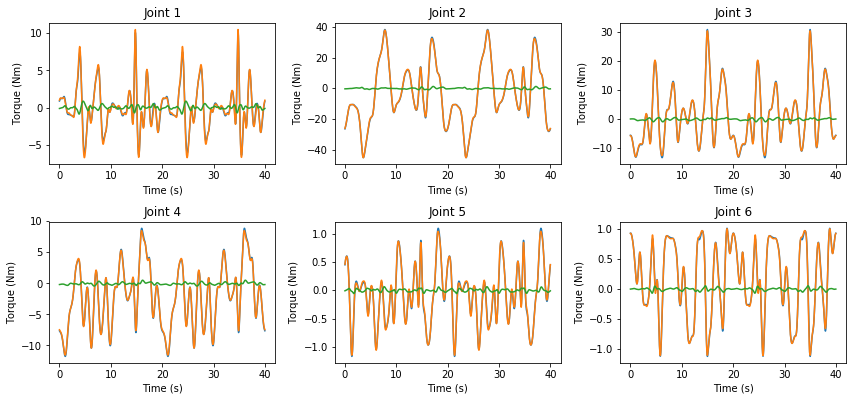

In [183]:
from matplotlib import pyplot as plt
plt.close()

plt.figure(figsize=(12,8))

axes = []
for i in range(tau.shape[1]):
    ax = plt.subplot(3, 3, i+1)
    ax.plot(t[:firsts],tau_raw[:,i][:firsts], label="Measured torque")
    ax.plot(t[:firsts],tau_pred[:,i][:firsts], label="Estimated torque")
    ax.plot(t[:firsts],err_pred[:,i][:firsts], label="Error")
    ax.set_title( "Joint %d"%(i+1) )
    plt.xlabel("Time (s)")
    plt.ylabel("Torque (Nm)")
    axes.append(ax)

plt.tight_layout()

plt.show()

In [184]:
delta_starextra = Pb*beta_starextra + (-Pb*rbt.dyn.Kd+rbt.dyn.Pd)*delta_d_starextra
K = np.matrix(Pb.T+rbt.dyn.Kd*rbt.dyn.Pd.T).astype(float)
delta_starextra_min = np.linalg.pinv(K)*beta_starextra

In [185]:
np.testing.assert_array_almost_equal(K * delta_starextra ,beta_starextra, 10)

In [186]:
for i in range(delta_starextra.shape[0]):
     print 'double ' + repr(rbt.dyn.dynparms[i]) + '    =    ' + repr(delta_starextra[i,0]) + ';'

double L_1xx    =    5773502.69189659;
double L_1xy    =    0;
double L_1xz    =    0;
double L_1yy    =    5773502.69189659;
double L_1yz    =    0;
double L_1zz    =    1.00011319889570e-6;
double l_1x    =    0;
double l_1y    =    0;
double l_1z    =    0;
double m_1    =    1.89112770787481;
double L_2xx    =    0.00198695134345772;
double L_2xy    =    -0.00263884074585480;
double L_2xz    =    -0.00761064299943835;
double L_2yy    =    0.00970921984715270;
double L_2yz    =    0.00285563417001337;
double L_2zz    =    0.0383283059892956;
double l_2x    =    0.199915582745087;
double l_2y    =    0.0449989884085606;
double l_2z    =    0.0449989859426950;
double m_2    =    4.49999895927593;
double L_3xx    =    0.0148052246494977;
double L_3xy    =    -0.00488743649875629;
double L_3xz    =    0.0178015590489966;
double L_3yy    =    0.0909699581087305;
double L_3yz    =    -0.000358486677797516;
double L_3zz    =    0.0857426070609197;
double l_3x    =    0.686314088767107;
dou

In [187]:
for i in range(delta_starextra.shape[0]):
     print 'double ' + repr(rbt.dyn.dynparms[i]) + '    =    ' + repr(delta_starextra_min[i,0]) + ';'

double L_1xx    =    2.2430170718571447e-17;
double L_1xy    =    1.0330703958022457e-16;
double L_1xz    =    -1.0417892834014457e-17;
double L_1yy    =    -1.838848051013073e-17;
double L_1yz    =    0.0;
double L_1zz    =    0.05732048047026843;
double l_1x    =    -7.157612108266939e-17;
double l_1y    =    -1.2992777358483022e-17;
double l_1z    =    8.574016752850091e-17;
double m_1    =    0.0;
double L_2xx    =    -0.03652325943727739;
double L_2xy    =    -0.021626390222468563;
double L_2xz    =    -0.007610642999438165;
double L_2yy    =    0.09384373990754608;
double L_2yz    =    0.0028556341700136704;
double L_2zz    =    0.18696542646278377;
double l_2x    =    1.2840889154707584;
double l_2y    =    0.19676582940139284;
double l_2z    =    -0.0028614383850758002;
double m_2    =    3.571075104573789e-05;
double L_3xx    =    -0.11336648938660424;
double L_3xy    =    -0.004887436498756467;
double L_3xz    =    -0.10976250086951297;
double L_3yy    =    0.2638086564121103

In [188]:
for i in range(delta_starextra.shape[0]):
     print  repr(rbt.dyn.dynparms[i]) + ': ' + repr(delta_starextra_min[i,0])

L_1xx: 2.2430170718571447e-17
L_1xy: 1.0330703958022457e-16
L_1xz: -1.0417892834014457e-17
L_1yy: -1.838848051013073e-17
L_1yz: 0.0
L_1zz: 0.05732048047026843
l_1x: -7.157612108266939e-17
l_1y: -1.2992777358483022e-17
l_1z: 8.574016752850091e-17
m_1: 0.0
L_2xx: -0.03652325943727739
L_2xy: -0.021626390222468563
L_2xz: -0.007610642999438165
L_2yy: 0.09384373990754608
L_2yz: 0.0028556341700136704
L_2zz: 0.18696542646278377
l_2x: 1.2840889154707584
l_2y: 0.19676582940139284
l_2z: -0.0028614383850758002
m_2: 3.571075104573789e-05
L_3xx: -0.11336648938660424
L_3xy: -0.004887436498756467
L_3xz: -0.10976250086951297
L_3yy: 0.2638086564121103
L_3yz: -0.00035848667779758795
L_3zz: 0.386753019400404
l_3x: 1.6900501664605423
l_3y: 0.002625069553142663
l_3z: -0.2225282736004551
m_3: 0.18125236543684803
L_4xx: 0.052664851131348334
L_4xy: 0.01414444403477113
L_4xz: 0.04898648687256533
L_4yy: 0.09777731589415782
L_4yz: -0.014503644719225193
L_4zz: 0.06808804697888252
l_4x: 0.5268636823643502
l_4y: 0.0

---------------------------

---------------------------

---------------------------

---------------------------

---------------------------

---------------------------

---------------------------

---------------------------

---------------------------

### (generate readme and notebook preview)

In [3]:
def save_files(): 
    from IPython.display import display, Javascript
    Javascript('IPython.notebook.save_notebook()')
    
    import json
    with open('WAM7 Dynamic Parameter Identification.ipynb', 'r') as f:
        d = json.load(f)
    with open('README.md', 'w') as f:
        f.write(''.join(d['worksheets'][0]['cells'][0]['source']).encode('UTF-8'))
    
    !ipython nbconvert "WAM7 Dynamic Parameter Identification.ipynb" --to html

In [3]:
#save_files()

In [36]:
#!git status

In [37]:
#!git commit -a -m "Add automathic README.md file generator"

In [38]:
#!git push